# <div style="text-align:center; border-radius:15px 0px; padding:10px; color:#00c49a; margin:0; font-size:110%; font-family:Pacifico; background-color:#18636d; overflow:hidden"><b> Machine learning - Customer Conversion Prediction</b></div>
# --------------------------------------------------------------------------------------------

<div style="border-radius:10px; padding: 15px; background-color: #18636d; font-size:120%; text-align:left">

<h3 align="left"><font color=#00c49a>Problem Summary</font></h3>

__The company is working on a project to improve its digital marketing by accurately predicting customer conversions. This is crucial for optimizing campaign performance and reducing wasted advertising spend. The project uses machine learning to analyze customer demographics and engagement metrics, aiming to improve campaign targeting, increase conversion rates, and maximize return on advertising spend.__


# -------------------------------------------------------------------------------------------

<div style="border-radius:10px; padding: 15px; background-color: #18636d; font-size:115%; text-align:left">

<h3 align="left"><font color=#00c49a>Objectives:</font></h3>

* __Explore the Dataset__:Use EDA and visualizations to understand key factors driving conversions.
* __Preprocessing Steps__:Bin, encode, scale features, and balance classes with SMOTE for accurate modeling.
* __Model Building__:
  - Establish models for prediction and highlight top features.
  - Implementation and tuning of multiple classifiers models including Logistic Regression(Ridge and Lasso),Decision Trees,Random Forest,Support Vector Classifer(SVC),XGBoost and Catboost.
  - Emphasize achieving high recall for superior performance in predicting conversions.
* __Evaluate and Compare Model Performance__:  Assess with F1, precision-recall, and cross-validation to ensure reliability.

# --------------------------------------------------------------------------------------------

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #18636d; font-size:115%; text-align:left">

<h3 align="left"><font color=00c49a><b>Table of Contents:</b></font></h3>

- **Step 1 | IMPORT THE LIBRARIES**
- **Step 2 | READ THE DATASET**
- **Step 3 | DATASET OVERVIEW**
  -  3.1 | Check The Data
  -  3.2 | Statistical Information of the Dataset
  - **3.3 | Statistical EDA**
  -   3.3.1 | Distribution (Categorical columns)
  -   3.3.2 | Outliers (ALL Columns)
  -   3.3.3 | CORRELATION (Numerical Columns)
- **Step 4 | EXPLORATORY DATA ANALYSIS(EDA)**
  -  **4.1 | CUSTOMER DEMOGRAPHICS**
    -  4.1.1 |  Gender Distribution
    -  4.1.2 |  Age and Income Distribution 
    -  4.1.3 |  Age vs. Conversion & Income vs. Conversion
    -  4.1.5 |  Gender and Age vs. Conversion
  - **4.2 | CUSTOMER ENGAGEMENT**
    -  4.2.1 | Engagement Distribution 
    -  4.2.2 | Website Visits and Pages Per Visits vs. Campaign Type and Channel
    -  4.2.3 | Average Time Spent on Site and Average Loyalty Points vs. Conversion
    -  4.2.4 | Percentage Of Returning Visitors
  - **4.3 | CAMPAIGN EFFECTIVENESS**
    -  4.3.1 | Campaign Channel and Type Distribution
    -  4.3.2 | Ad Spend and Click through Rate(CTR) Distribution
    -  4.3.3 | Click Through Rates vs. Conversion
    -  4.3.4 | Conversion by Campaign Type and Channel
    -  4.3.5 | Total Ad Spend vs. Conversion
- **Step 5 | PREPROCESSING and FEATURES ENGINEERING**
  -  5.1 | Binning
  -  5.2 | Encoding of the categorical Variables
  -  5.3 | Define Feature and Target
  -  5.4 | Scaled the numeric Features
  -  5.5 | Handle Class Imbalance using SMOTE
  -  5.6 | Split Data into Train and Test
- **Step 6 | MODEL TRANING and EVALUATION**
  - Step 6.1 | Create Model Evaluation and Plot Function for Models results
  - Step 6.2 | Model Building
    -  6.2.1 | Logistic Regression (Ridge)
    -  6.2.2 | Logistic Regression (Lasso)
    -  6.2.3 | Decision Tree
    -  6.2.4 | Random Forest
    -  6.2.5 | Support Vector Classifier(SVC)
    -  6.2.6 | XGBoost
    -  6.2.7 | CatBoost
  - Step 6.3 | Model Comparison
- **Step 7 | Best Model Selection**
  - Step 7.1 | Save Model

# --------------------------------------------------------------------------------------------


### <p style="background-color:#18636d; font-family:calibri; color:#00c49a;padding:10px; font-size:150%; text-align:center; border-radius:50px 50px;">Step 1 | IMPORT THE LIBRARIES</p>

# --------------------------------------------------------------------------------------------

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis,chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import catboost as cb
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score,precision_score, recall_score,precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import joblib
import warnings

warnings.filterwarnings('ignore')

### <p style="background-color:#18636d; font-family:calibri; color:#00c49a ;padding:10px; font-size:150%; text-align:center; border-radius:50px 50px;">Step 2 | READ THE DATASET</p>

# --------------------------------------------------------------------------------------------

In [3]:
data = pd.read_csv('digital_marketing_campaign_dataset.csv')

### <p style="background-color:#18636d; font-family:calibri; color:#00c49a;padding:10px; font-size:150%; text-align:center; border-radius:50px 50px;"> Step 3 | DATASET OVERVIEW </p>

# --------------------------------------------------------------------------------------------

###  CHECK THE DATA

In [4]:
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [5]:
data.tail()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1
7999,15999,31,Female,93002,Email,Awareness,7743.627070,0.185670,0.057228,15,6.964739,12.763660,2,18,9,9,341,IsConfid,ToolConfid,0


In [6]:
# Check the No.of Rows and Columns
data.shape

(8000, 20)

In [7]:
# Check the Data Type of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [8]:
# Check For Missing Values in the Dataset
data.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [9]:
# Check For Duplicates Values in the Dataset
data.duplicated().sum()

0

In [10]:
# Count of Categories in the categorical columns 
cat_cols= data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print(f"Column Name : {data[column].value_counts()}")

Column Name : Gender
Female    4839
Male      3161
Name: count, dtype: int64
Column Name : CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64
Column Name : CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64
Column Name : AdvertisingPlatform
IsConfid    8000
Name: count, dtype: int64
Column Name : AdvertisingTool
ToolConfid    8000
Name: count, dtype: int64


In [11]:
# Count of Target Columns which is [(Yes/No) which values are (1/0)] 
data['Conversion'].value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64

# --------------------------------------------------------------------------------------------

###  Statistical Information of the Dataset 

In [12]:
data.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [13]:
# Check Distribusion of Numerical Columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

for column in num_cols:
    print(f"Column Name :{column}")
    print(f"Skewness :{skew(data[column])} ")

Column Name :CustomerID
Skewness :0.0 
Column Name :Age
Skewness :-0.004915537678131156 
Column Name :Income
Skewness :-0.011295905499299767 
Column Name :AdSpend
Skewness :0.01922065893168252 
Column Name :ClickThroughRate
Skewness :0.011064268307023116 
Column Name :ConversionRate
Skewness :0.012774983034090455 
Column Name :WebsiteVisits
Skewness :-0.017136195790910264 
Column Name :PagesPerVisit
Skewness :-0.012507222412290206 
Column Name :TimeOnSite
Skewness :0.014606950163317511 
Column Name :SocialShares
Skewness :-0.011355073178532087 
Column Name :EmailOpens
Skewness :0.0076773981262905485 
Column Name :EmailClicks
Skewness :0.023361203832124304 
Column Name :PreviousPurchases
Skewness :0.0057107339133102885 
Column Name :LoyaltyPoints
Skewness :0.0163004128427928 
Column Name :Conversion
Skewness :-2.2886824384215787 


In [14]:
# Check For outlier in Numerical Columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

for column in num_cols:
    print(f"Column Name :{column}")
    print(f"Kurtosis :{kurtosis(data[column])} ")

Column Name :CustomerID
Kurtosis :-1.2000000375000013 
Column Name :Age
Kurtosis :-1.179007558805151 
Column Name :Income
Kurtosis :-1.2089506599739357 
Column Name :AdSpend
Kurtosis :-1.197802879970722 
Column Name :ClickThroughRate
Kurtosis :-1.2026584981257546 
Column Name :ConversionRate
Kurtosis :-1.211036519198927 
Column Name :WebsiteVisits
Kurtosis :-1.1886872044656513 
Column Name :PagesPerVisit
Kurtosis :-1.220213955771705 
Column Name :TimeOnSite
Kurtosis :-1.2085430210619679 
Column Name :SocialShares
Kurtosis :-1.2092589671211533 
Column Name :EmailOpens
Kurtosis :-1.1701833232847716 
Column Name :EmailClicks
Kurtosis :-1.2072613125308935 
Column Name :PreviousPurchases
Kurtosis :-1.227167817558375 
Column Name :LoyaltyPoints
Kurtosis :-1.1748994362978038 
Column Name :Conversion
Kurtosis :3.238067303939345 


In [15]:
# Correlation Of Categorical vs Categorical
# Gender
contigency1 = pd.crosstab(data['Gender'],data['Conversion'])
chi2,p,dof,expected = chi2_contingency(contigency1)
print("Gender:Chi-Square:",chi2,"p-value-",p)

# Campagin Channel
contigency2 = pd.crosstab(data['CampaignChannel'],data['Conversion'])
chi2,p,dof,expected = chi2_contingency(contigency2)
print("Champagin Channel:Chi-Square:",chi2,"p-value-",p)

# Champagin Type
contigency3 = pd.crosstab(data['CampaignType'],data['Conversion'])
chi2,p,dof,expected= chi2_contingency(contigency3)
print("Champagin Type:Chi-Square:",chi2,"p-value-",p)

Gender:Chi-Square: 0.0037714130430877447 p-value- 0.9510312300044484
Champagin Channel:Chi-Square: 2.7848540643624053 p-value- 0.5944499903760994
Champagin Type:Chi-Square: 84.45439577326073 p-value- 3.3983347098681334e-18


### Statistical EDA

##### Distribution (Categorical columns)

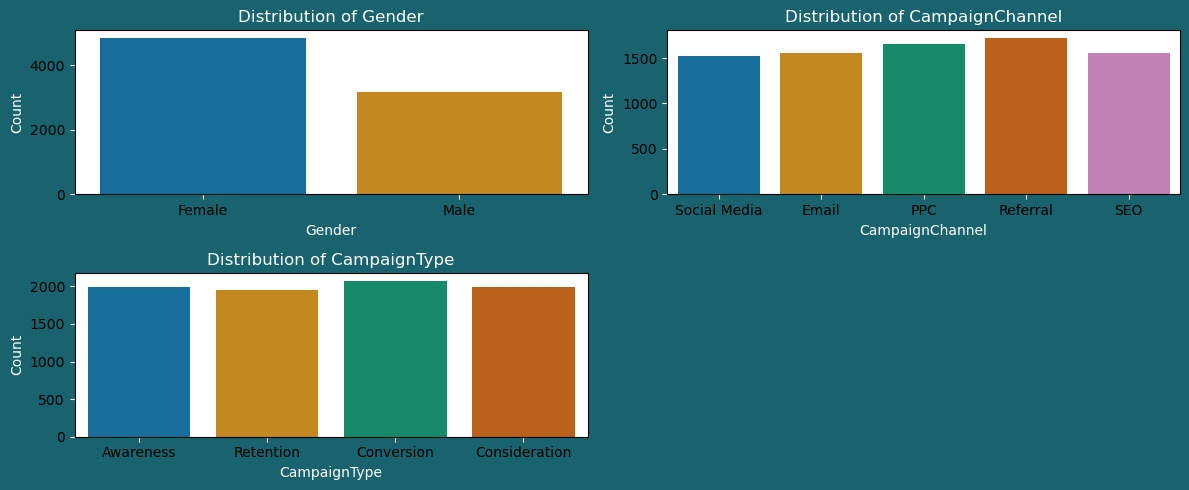

In [16]:
category_cols = ['Gender', 'CampaignChannel', 'CampaignType'] # Define the categorical columns


fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(12,5)) # Create Subplots
axes = axes.flatten()
fig.patch.set_facecolor("#18636d")  # Set Background Color


for i, col in enumerate(category_cols): # Iterate over each categorical column and create a count plot
    sns.countplot(data=data, x=col, ax=axes[i],palette="colorblind")
    axes[i].set_title(f'Distribution of {col}', fontsize=12, color='white')
    axes[i].set_xlabel(col, fontsize=10, color='white')
    axes[i].set_ylabel('Count', fontsize=10,color='white')
    axes[i].tick_params(axis='both',color='white') 


fig.delaxes(axes[-1]) # Remove the empty subplot (the last one)
plt.tight_layout()
plt.show()

##### Outliers (Numerical Columns)

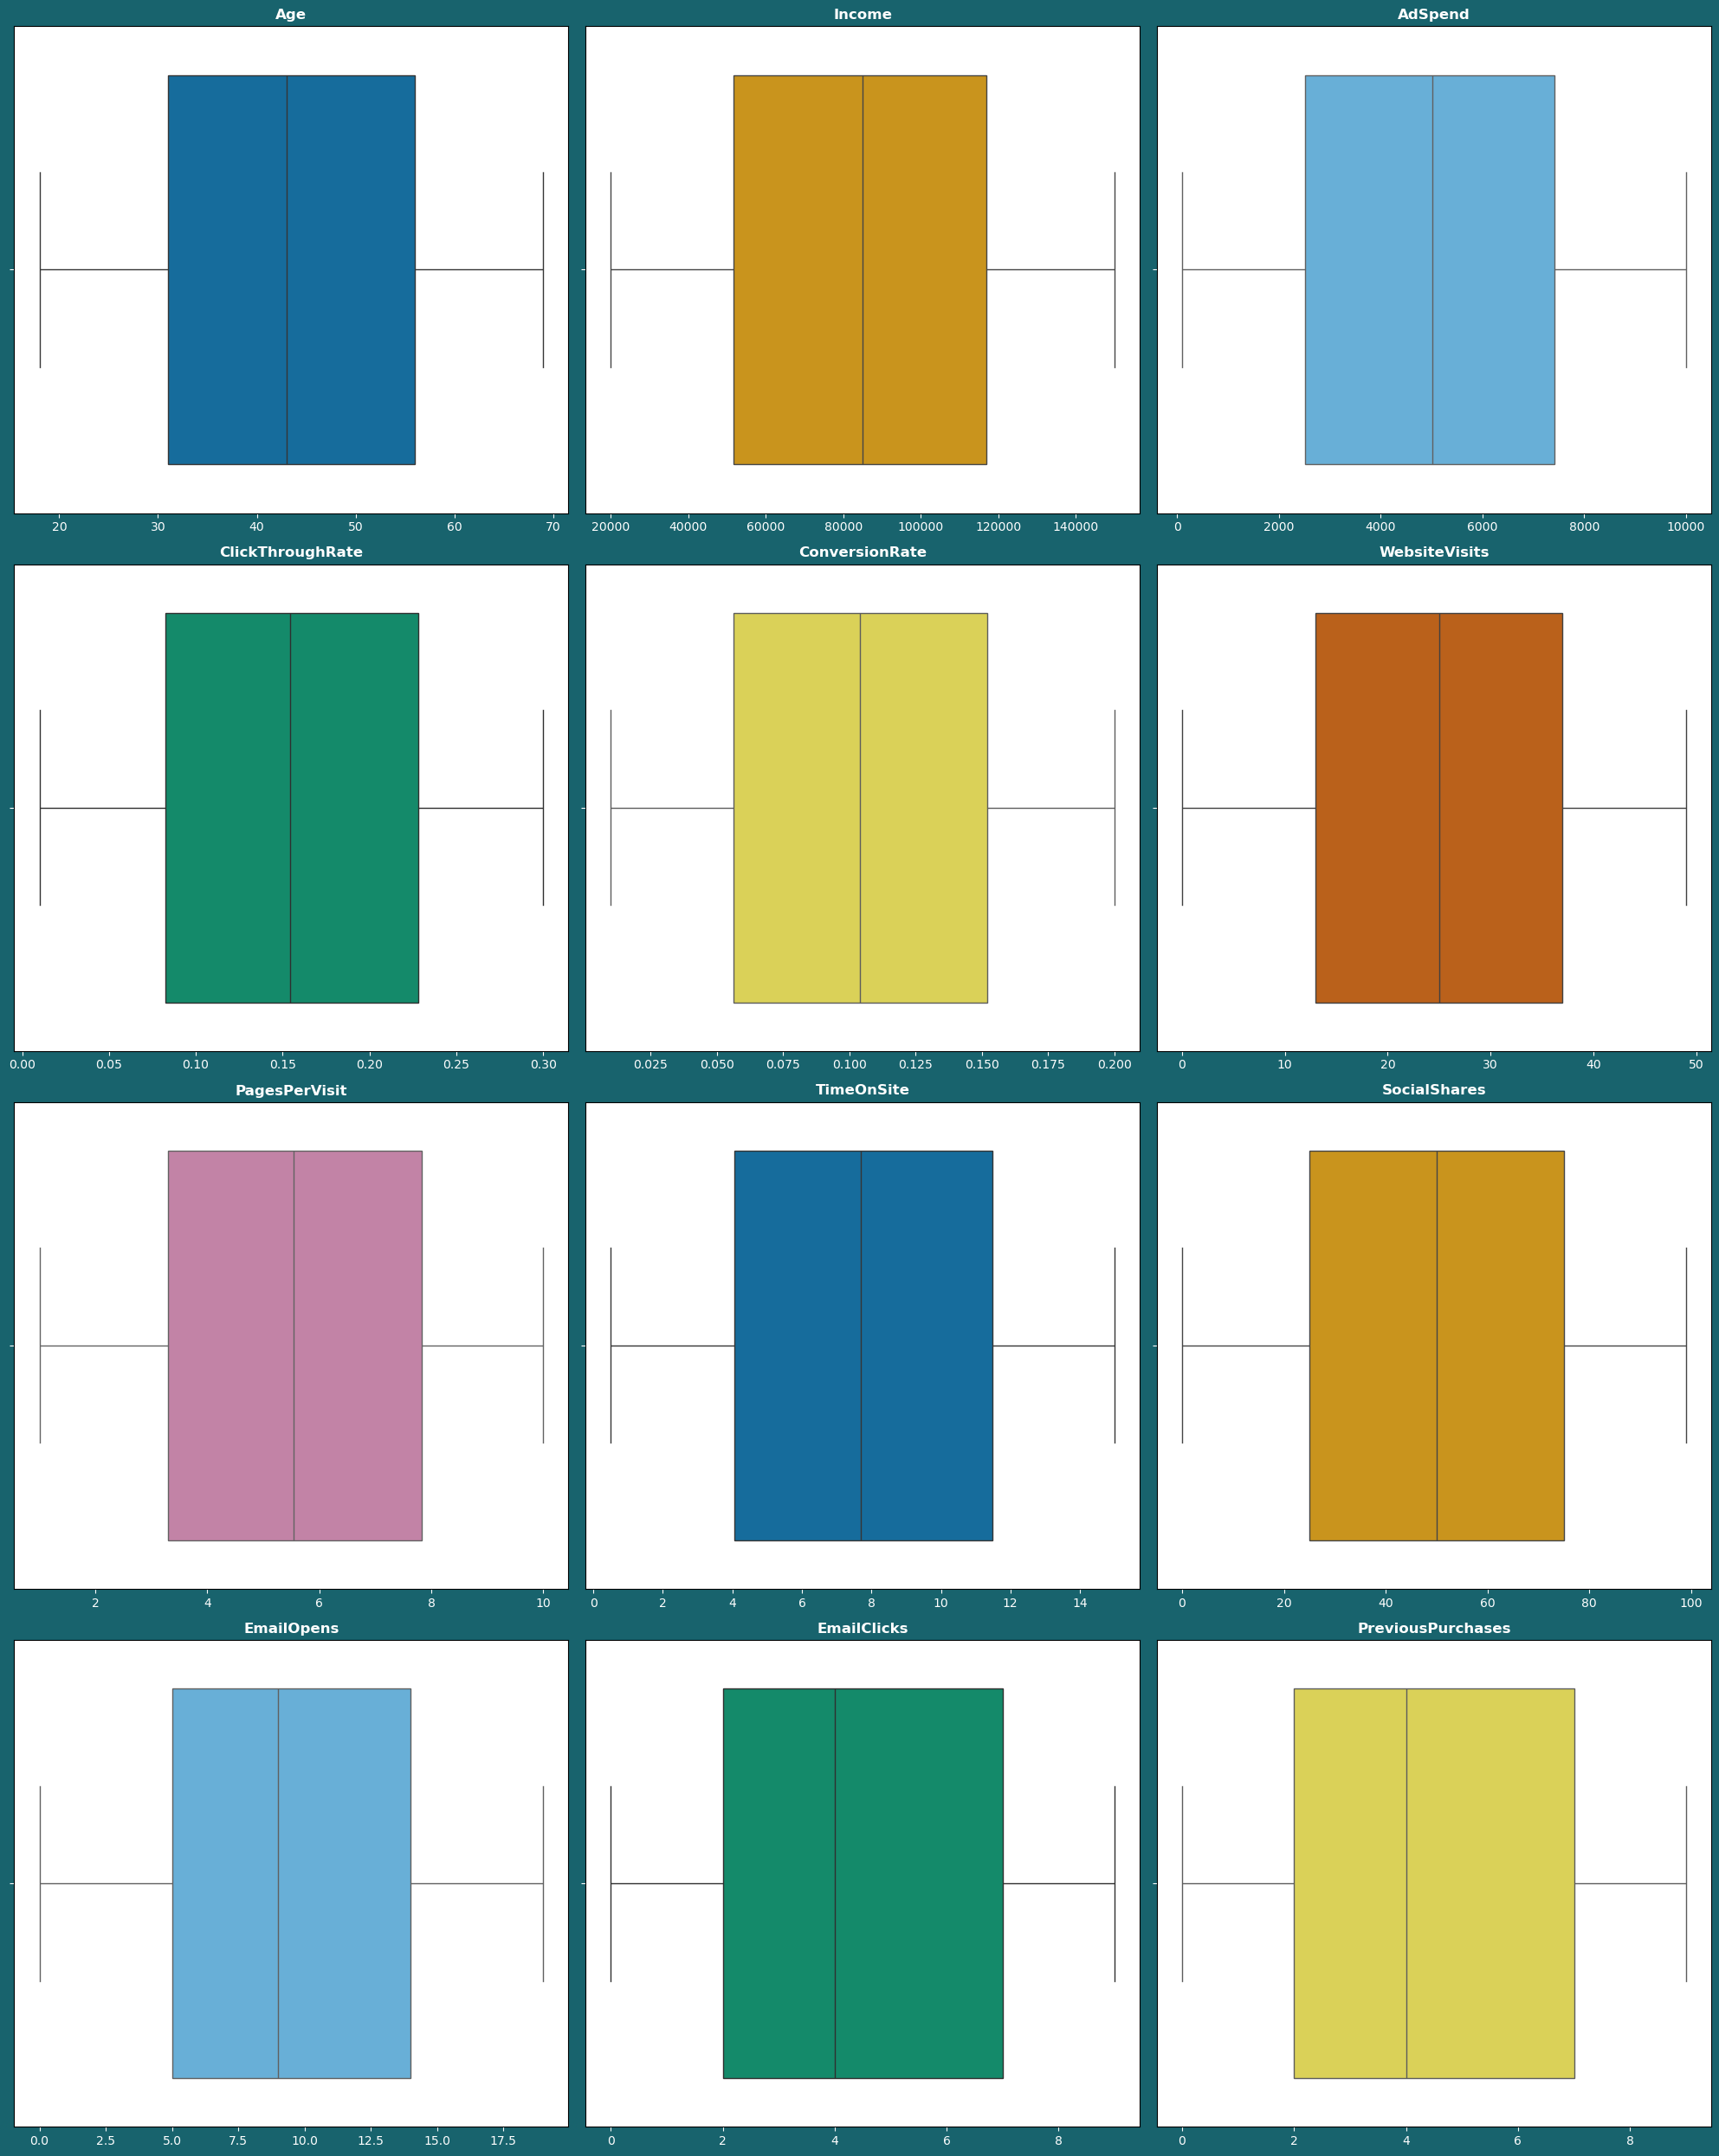

In [17]:
pastel_colors = ['#0072B2', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#D55E00', '#CC79A7'] # Define Pastel Colors for Boxplots


fig, axes = plt.subplots(nrows=4,ncols=3, figsize=(20, 25)) # Create Subplots
axes = axes.flatten()
fig.patch.set_facecolor("#18636d")  # Set Background Color

# List of Columns to Plot
columns = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate','WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares','EmailOpens', 'EmailClicks', 'PreviousPurchases']

# Plot Each Boxplot with a Specific Pastel Color and Outlier Annotations
for i, col in enumerate(columns):
    sns.boxplot(x=data[col], ax=axes[i], color=pastel_colors[i % len(pastel_colors)])
    # Adjust Styling
    axes[i].set_title(f'{col}', fontsize=12, fontweight="bold", color="white")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='both', colors="white")

    
plt.tight_layout()
plt.show()


##### Correlation (Numerical columns)

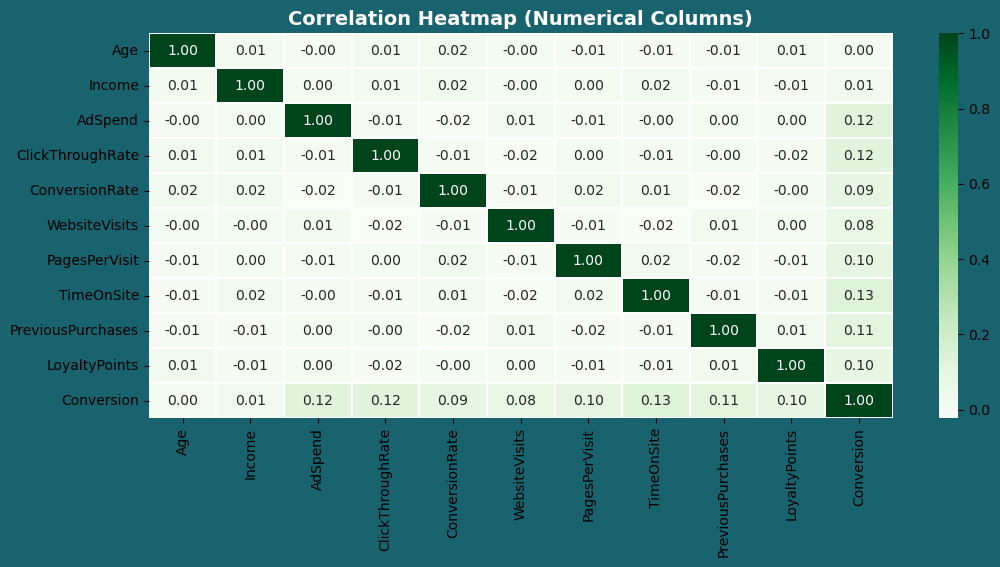

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))
fig.patch.set_facecolor("#18636d")  # Background color

# Compute correlation matrix
corr_matrix = data[['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate','WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']].corr()

# Create heatmap
sns.heatmap(corr_matrix,fmt='.2f', annot=True, cmap='Greens', linewidths=0.1, ax=ax)
ax.set_title("Correlation Heatmap (Numerical Columns)", fontsize=14, fontweight="bold", color="white") # Title & Styling
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #18636d; font-size:120%; text-align:left">

<h2 align="left"><font color=#00c49a >Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __CustomerID__ | Unique identifier for each customer. |
| __Age__ | Customer's age in years. |
| __Gender__ | Customer's gender  (Male/Female) |
| __Income__ | Customer's annual income in USD |
| __CampaignChannel__ | Marketing channel used (e.g., Social Media, Email). |             | __CampaignType__ | Type of campaign (e.g., Awareness, Conversion). |
| __AdSpend__ | Amount spent on advertising in USD |  
| __ClickThroughRate__ |Ratio of ad clicks to impressions. |         
| __ConversionRate__ | Ratio of conversions to total interactions.|
| __WebsiteVisits__ | Number of visits to the website |
| __PagesPerVisit__ | Average pages viewed per website visit. |  
| __TimeOnSite__ | Average time spent on the website per visit (in minutes) |
| __SocialShares__ | Number of times the content was shared on social media |   
| __EmailOpens__ | Number of times marketing emails were opened by the customer. |
| __EmailClicks__ | Number of times links in marketing emails were clicked |   
| __PreviousPurchases__ | Number of previous purchases made by the customer |
| __LoyaltyPoints__ | Number of loyalty points accumulated by the customer |   
| __AdvertisingPlatform__ | Confidential |
| __AdvertisingTool__ | Confidential |                      
| __Conversion__ | Binary variable indicating whether the customer converted (1) or not (0) |              


# Key Observations
1. **Age**: Will likely have a wide span (e.g., 18-70), and the lower end (20-35) may have better conversion rates since they are computer literate.
2. **Gender**: Conversion can skew by a few points towards one gender (i.e., Female), based on product or campaign focus.
3. **Income**: More affluent income levels (e.g., >$50K) can possibly afford more ad spend and conversions, but middle-income levels could be the average in the dataset.

4. **CampaignChannel**: E-mail and Social Media are the most common channels, and of these, Social Media is one that can generate more web traffic and conversions.
5. **CampaignType**: Conversion campaigns would most probably have the best success rate, while Awareness campaigns are responsible for most website traffic rather than direct conversions.
6. **AdSpend**: An asymmetric distribution (e.g., mean > median) suggests there are some high-spend outliers, and moderate spends (e.g.,$1K-$5K) convert best.
7. **ClickThroughRate**: Will probably be low on average (e.g., 0.05-0.20), with more successful conversions relating to higher rates.
8. **ConversionRate**: Probably be low (e.g., 0.01-0.15), indicating an imbalanced target variable because most customers do not convert.
9. **WebsiteVisits**: Probably right-skewed, with high-frequency visitors (e.g., >10) being more likely to convert.
10. **PagesPerVisit**: Higher values (e.g., >3)  indicate involvement and be positively associated with conversion.
11. **TimeOnSite**: Longer time periods (e.g., >5 minutes) suggest interest, with high probability of conversion.
12. **SocialShares**: Less frequent but more effective; share-holding customers (e.g., >10) can spread campaign reach and conversion likelihood.
13. **EmailOpens**: High frequency openers (e.g., >5) indicate email campaign success, probably with a correlation to conversions.
14. **EmailClicks**: Far more impactful than opens, clicks (e.g., >2) are a direct gauge of interest and conversion potential.
15. **PreviousPurchases**: Former purchasers (e.g., >1) have a greater probability of converting once more, a sign of loyalty.
16. **LoyaltyPoints**: Higher points (e.g., >1000) indicate correlation with increased frequency of interaction and conversion rate boost.
18. **Conversion**: Since the target's probable imbalance (e.g., 10-20% positive), our models would probably require SMOTE.

### Overall Observations
- **Engagement Metrics**: `TimeOnSite`, `PagesPerVisit`, and `EmailClicks` metrics will likely be good predictors of conversion because they are customer interest-related metrics.
- **Skewness**: Numerical attributes (e.g., `AdSpend`, `WebsiteVisits`, `SocialShares`) will probably be right-skewed, with low values prevalent but with a few high outliers.
- **Categorical Impact**: `CampaignChannel` and `CampaignType` could have varying patterns of conversion, where some combinations (e.g., Social Media + Conversion) work better than others.

- **Customer Loyalty**: `PreviousPurchases` and `LoyaltyPoints` suggest that return customers are a significant conversion influencer.

# --------------------------------------------------------------------------------------------

### <p style="background-color:#18636d; font-family:calibri; color:#00c49a;padding:10px; font-size:150%; text-align:center; border-radius:50px 50px;"> Step 4 | Exploratory Data Analysis (EDA) </p>

# --------------------------------------------------------------------------------------------
##### This dataset is used to identify customer demographic and engagement patterns influencing conversions. Visualizations, such as histograms and bar plots, provide insights for feature engineering and model development, enhancing campaign targeting and ROAS.

### <p style="background-color:#18636d; font-family:calibri; color:#00c49a;padding:10px; font-size:150%; text-align:center; border-radius:50px 50px;"> CUSTOMER DEMOGRAPHICS</p>
# --------------------------------------------------------------------------------------------

#### UNIVARIATE ANALYSIS
##### Gender Distribution

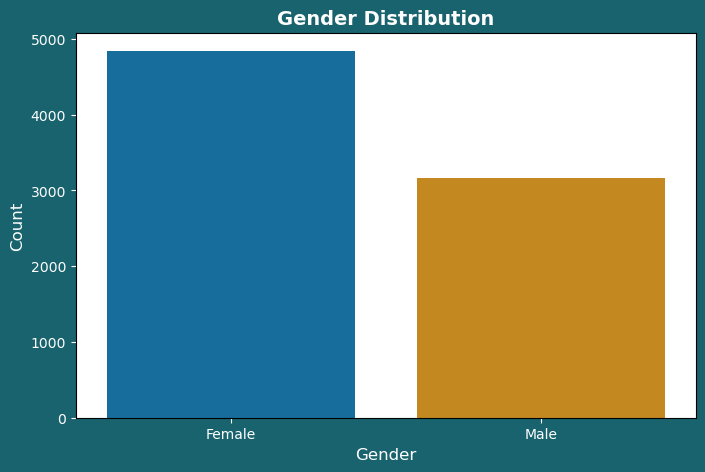

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor("#18636d")  # Background color

# Create count plot
sns.countplot(x='Gender', data=data, ax=ax, palette="colorblind")
ax.set_title("Gender Distribution", fontsize=14, fontweight="bold", color="white")  # Bold title
ax.set_xlabel("Gender", fontsize=12, color="white")
ax.set_ylabel("Count", fontsize=12, color="white")
ax.tick_params(axis='both', colors="white") 
plt.show()

#####  Age and Income Distribution 

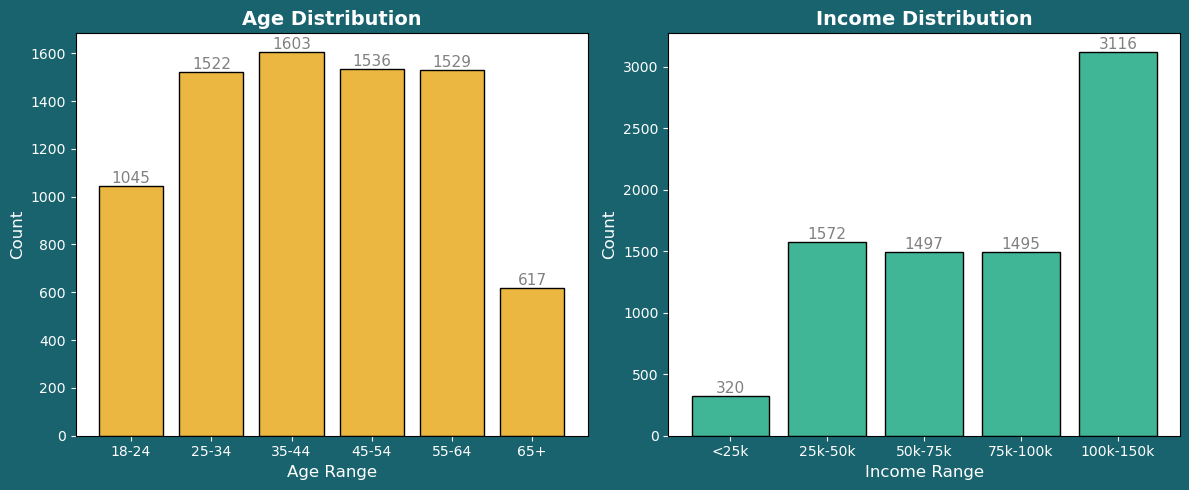

In [20]:
# Define Age and Income Bins
data["AgeGroup"] = pd.cut(data["Age"], bins=[18, 25, 35, 45, 55, 65, np.inf], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
data["IncomeGroup"] = pd.cut(data["Income"], bins=[0, 25000, 50000, 75000, 100000, 150000], labels=['<25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k'])


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.patch.set_facecolor("#18636d")  # Background color

# Age Distribution Histogram
ax1 = sns.histplot(data=data, x="AgeGroup", ax=axes[0], color="#E69F00", shrink=0.8)
axes[0].set_title("Age Distribution", fontsize=14, fontweight="bold", color="white")
axes[0].set_xlabel("Age Range", fontsize=12, color="white")
axes[0].set_ylabel("Count", fontsize=12, color="white")
axes[0].tick_params(axis="both", colors="white")

for p in ax1.patches:                     # Add count labels on top
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()),  
                     ha='center', va='bottom', fontsize=11, color='#808080')

# Income Distribution Histogram
ax2 = sns.histplot(data=data, x="IncomeGroup", ax=axes[1], color="#009E73", shrink=0.8)
axes[1].set_title("Income Distribution", fontsize=14, fontweight="bold", color="white")
axes[1].set_xlabel("Income Range", fontsize=12, color="white")
axes[1].set_ylabel("Count", fontsize=12, color="white")
axes[1].tick_params(axis="both", colors="white")

for p in ax2.patches:                  
    axes[1].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()),  
                     ha='center', va='bottom', fontsize=11, color='#808080')

plt.tight_layout()
plt.show()

#### BIVARIATE
##### Age vs. Conversion & Income vs. Conversion

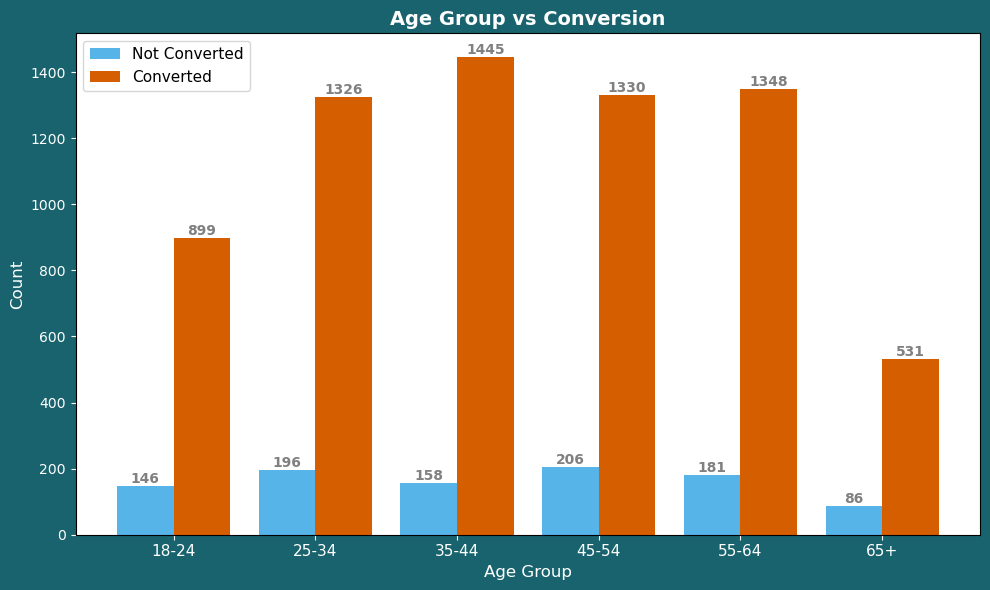

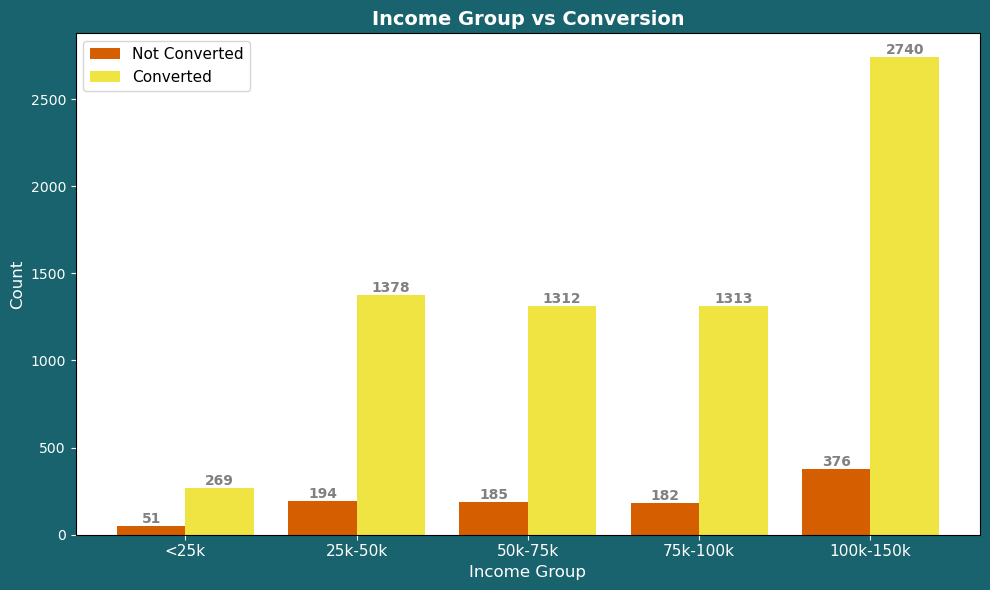

In [21]:
#  Define Age Bins
bins = [18, 25, 35, 45, 55, 65, np.inf]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data["AgeGroup"] = pd.cut(data["Age"], bins=bins, labels=labels)

age_conversions = data.groupby("AgeGroup")["Conversion"].value_counts().unstack().fillna(0) #  Count conversions for each age group

# Create figure 
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("#18636d")  # Background color

#  X-axis labels and width for grouped bars
x = np.arange(len(labels))
width = 0.4  

#  Plot grouped bar chart
rects1 = ax.bar(x - width/2, age_conversions[0], width, label='Not Converted', color='#56B4E9')
rects2 = ax.bar(x + width/2, age_conversions[1], width, label='Converted', color='#D55E00')

# Formatting
ax.set_title("Age Group vs Conversion", fontsize=14, fontweight="bold", color="white")  
ax.set_xlabel("Age Group", fontsize=12, color="white")
ax.set_ylabel("Count", fontsize=12, color="white")
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11, color="white")
ax.tick_params(axis='both', colors="white")  
ax.legend(fontsize=11, loc="upper left") # Legend

# Add labels on top of bars
for rect in rects1 + rects2:
    height = rect.get_height()
    if height > 0:
        ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', 
                ha='center', va='bottom', fontsize=10, color='#808080', fontweight="bold")

plt.tight_layout()
plt.show()


#  Define Income Bins
income_bins = [0, 25000, 50000, 75000, 100000, 150000]
income_labels = ['<25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k']
data["IncomeGroup"] = pd.cut(data["Income"], bins=income_bins, labels=income_labels)

#  Count conversions for each income group
income_conversions = data.groupby("IncomeGroup")["Conversion"].value_counts().unstack().fillna(0)

#  Create figure and axis with background color
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("#18636d")  # Background color

#  X-axis labels and width for grouped bars
x = np.arange(len(income_labels))
width = 0.4  

#  Plot grouped bar chart
rects1 = ax.bar(x - width/2, income_conversions[0], width, label='Not Converted', color='#D55E00')
rects2 = ax.bar(x + width/2, income_conversions[1], width, label='Converted', color='#F0E442')

#  Formatting
ax.set_title("Income Group vs Conversion", fontsize=14, fontweight="bold", color="white")  
ax.set_xlabel("Income Group", fontsize=12, color="white")
ax.set_ylabel("Count", fontsize=12, color="white")
ax.set_xticks(x)
ax.set_xticklabels(income_labels, fontsize=11, color="white")
ax.tick_params(axis='both', colors="white")  
ax.legend(fontsize=11, loc="upper left") #  Legend

#  Add labels on top of bars
for rect in rects1 + rects2:
    height = rect.get_height()
    if height > 0:
        ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', 
                ha='center', va='bottom', fontsize=10, color='#808080', fontweight="bold")

plt.tight_layout()
plt.show()

#### MULTIVARIATE
##### Gender & Age vs. Conversion

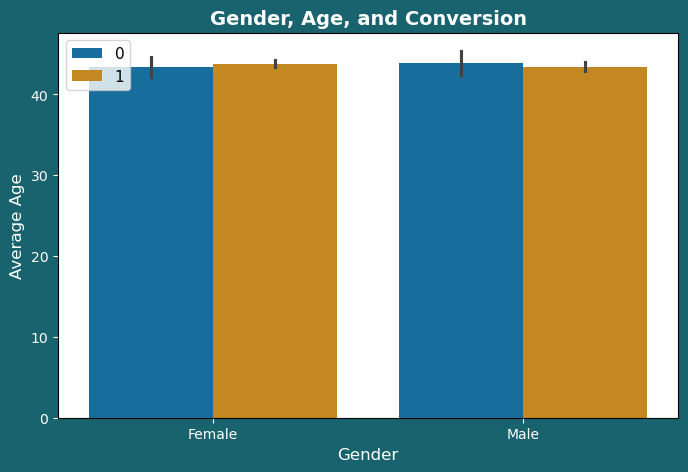

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor("#18636d")  # Background color

# Create bar plot
sns.barplot(x='Gender', y='Age', hue='Conversion', data=data, ax=ax, palette="colorblind")
ax.set_title("Gender, Age, and Conversion", fontsize=14, fontweight="bold", color="white")
ax.set_xlabel("Gender", fontsize=12, color="white")
ax.set_ylabel("Average Age", fontsize=12, color="white")
ax.tick_params(axis='both', colors="white")  # Make ticks white for visibility
ax.legend(fontsize=11, loc="upper left") #  Legend
plt.show()

# --------------------------------------------------------------------------------------------

### <p style="background-color:#18636d; font-family:calibri; color:#00c49a;padding:10px; font-size:150%; text-align:center; border-radius:50px 50px;"> CUSTOMER ENGAGEMENT </p>
# --------------------------------------------------------------------------------------------

#### Univariate Analysis
##### Engagement Distribution

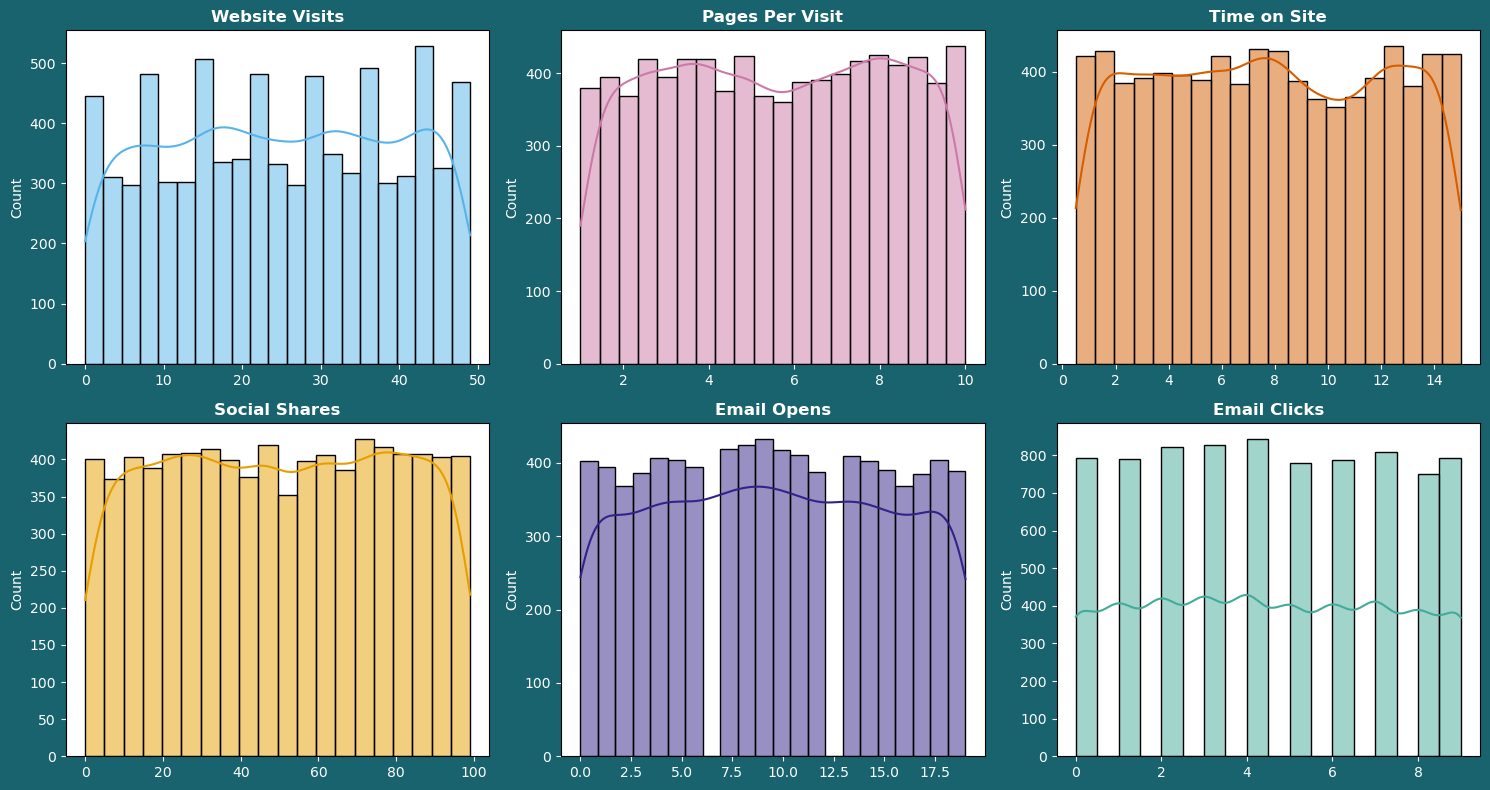

In [23]:
# Create figure and set background color
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
fig.patch.set_facecolor("#18636d")  # Background color
ax = ax.flatten()

# Histograms for Website Engagement Metrics
sns.histplot(data['WebsiteVisits'], ax=ax[0], color="#56B4E9", kde=True)
sns.histplot(data['PagesPerVisit'], ax=ax[1], color="#CC79A7", kde=True)
sns.histplot(data['TimeOnSite'], ax=ax[2], color="#D55E00", kde=True)
sns.histplot(data['SocialShares'], ax=ax[3], color="#E69F00", kde=True)
sns.histplot(data['EmailOpens'], ax=ax[4], color="#332288", kde=True)
sns.histplot(data['EmailClicks'], ax=ax[5], color="#44AA99", kde=True)

# Titles for each plot
ax[0].set_title("Website Visits", fontsize=12, fontweight="bold", color="white")
ax[1].set_title("Pages Per Visit", fontsize=12, fontweight="bold", color="white")
ax[2].set_title("Time on Site", fontsize=12, fontweight="bold", color="white")
ax[3].set_title("Social Shares", fontsize=12, fontweight="bold", color="white")
ax[4].set_title("Email Opens", fontsize=12, fontweight="bold", color="white")
ax[5].set_title("Email Clicks", fontsize=12, fontweight="bold", color="white")

# Adjust labels and ticks
for a in ax:
    a.set_xlabel("")
    a.set_ylabel("Count", fontsize=10, color="white")
    a.tick_params(axis='both', colors="white")

plt.tight_layout()    
plt.show()

#### BIVARIATE ANALYSIS 
##### Website Visits  & Page Per Visits vs. Campaign Type and Channel

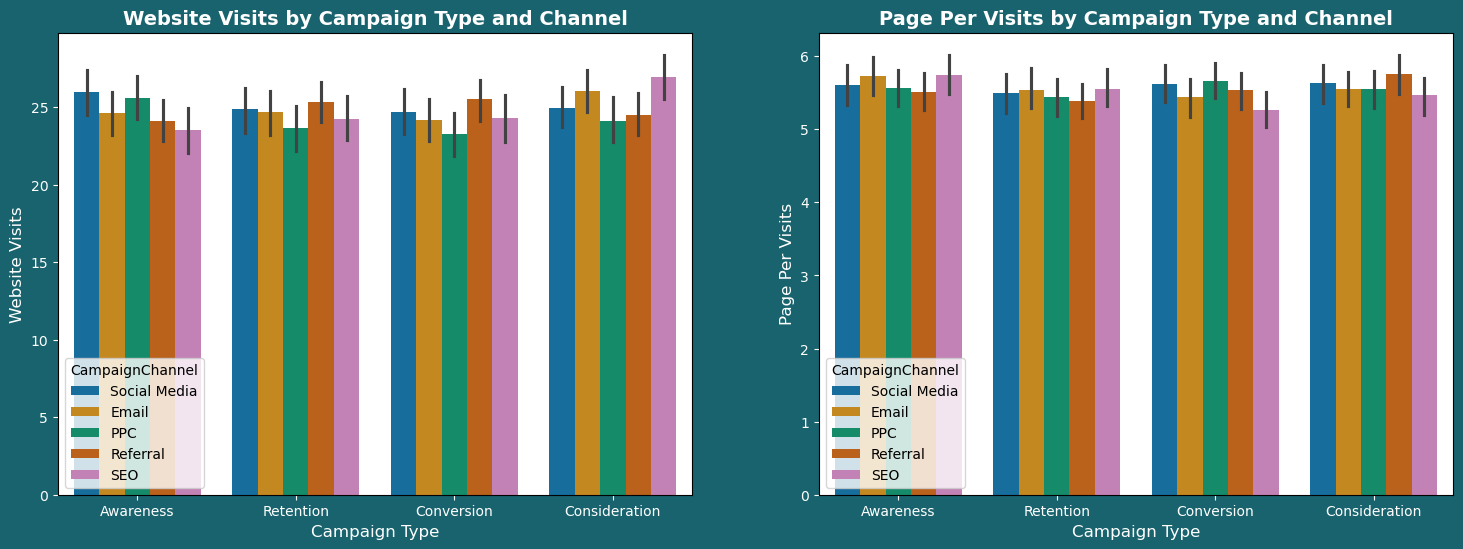

In [24]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
fig.patch.set_facecolor("#18636d")  # Background color
ax= ax.flatten()

# Barplot for Website Visits and Page Per Visits by Campaign Type and Channel
sns.barplot(x='CampaignType', y='WebsiteVisits', hue='CampaignChannel', data=data, ax=ax[0], palette="colorblind")
sns.barplot(x='CampaignType', y='PagesPerVisit', hue='CampaignChannel', data=data, ax=ax[1], palette="colorblind")
ax[0].set_title("Website Visits by Campaign Type and Channel", fontsize=14, fontweight="bold", color="white")
ax[1].set_title("Page Per Visits by Campaign Type and Channel", fontsize=14, fontweight="bold", color="white")
ax[0].set_xlabel("Campaign Type", fontsize=12, color="white")
ax[0].set_ylabel("Website Visits", fontsize=12, color="white")
ax[0].tick_params(axis='both', colors="white")
ax[1].set_xlabel("Campaign Type", fontsize=12, color="white")
ax[1].set_ylabel("Page Per Visits", fontsize=12, color="white")
ax[1].tick_params(axis='both', colors="white")
plt.show()

##### Avg. Time On Site and Loyalty Points vs. Conversion

In [25]:
# Calculate Avg. Time on site for conversion(1/0)
avg_tosc = data[data['Conversion']==1]['TimeOnSite'].mean()
avg_tosnc = data[data['Conversion']==0]['TimeOnSite'].mean()
avg_tos_data={
    "Conversion":['Converted','Non-Converted'],
    "Avg.Time On Site(mins)":[avg_tosc,avg_tosnc]
}
tos_df = pd.DataFrame(avg_tos_data)

In [26]:
# Calculate Average Loyalty Points for Converted and Non-Converted Users
avg_loyalty_c = data[data['Conversion'] == 1]['LoyaltyPoints'].mean()
avg_loyalty_nc = data[data['Conversion'] == 0]['LoyaltyPoints'].mean()

#  Prepare Data
avg_loyalty_data = {
    "Conversion": ["Converted","Non-Converted"],
    "Avg.Loyalty Points": [avg_loyalty_c,avg_loyalty_nc]
}
loyalty_df = pd.DataFrame(avg_loyalty_data)

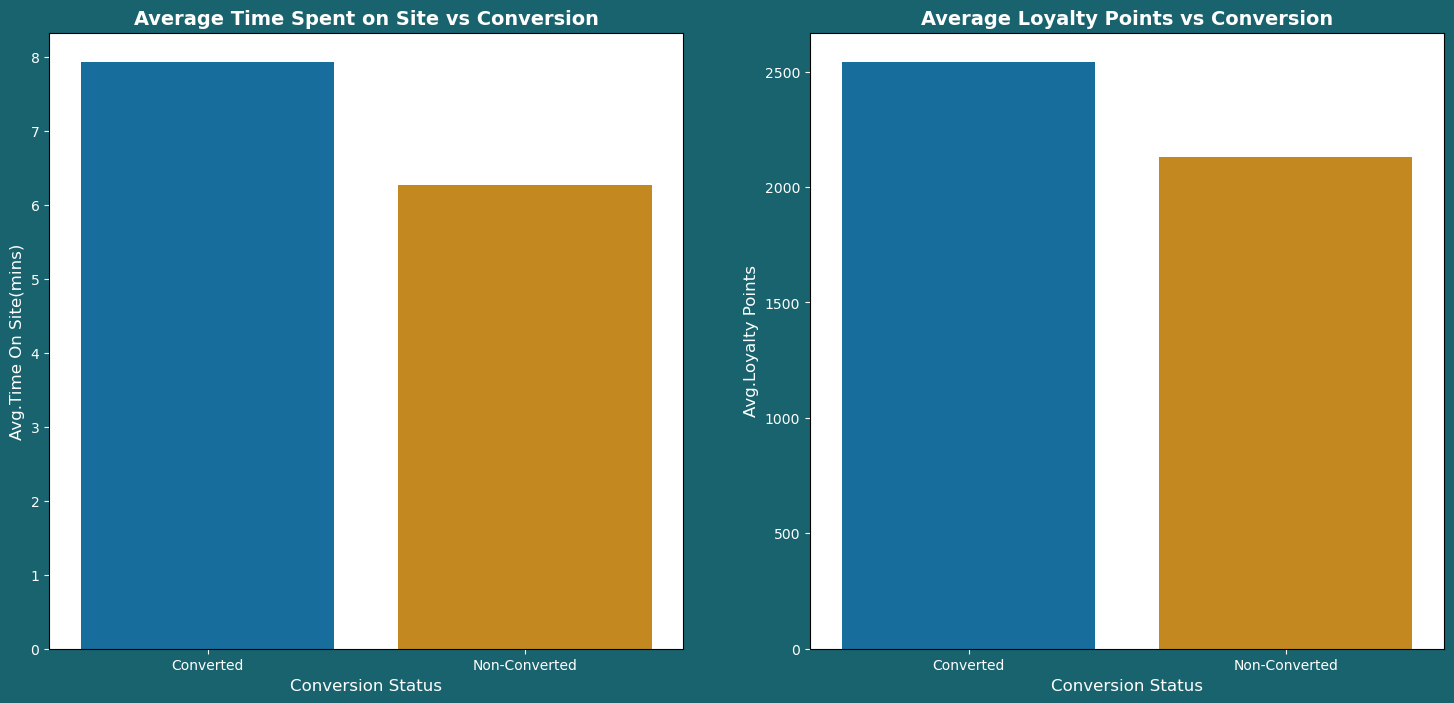

In [27]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
fig.patch.set_facecolor("#18636d")  # Background color
ax= ax.flatten()

# Barplot for Avg. Time on site and Avg. Loyalty Points vs. Conversion
sns.barplot(x='Conversion',y='Avg.Time On Site(mins)',data=tos_df,ax=ax[0],palette="colorblind")
sns.barplot(x='Conversion',y='Avg.Loyalty Points',data=loyalty_df,ax=ax[1],palette="colorblind")

ax[0].set_title("Average Time Spent on Site vs Conversion", fontsize=14, fontweight="bold", color="white")
ax[1].set_title("Average Loyalty Points vs Conversion", fontsize=14, fontweight="bold", color="white")

ax[0].set_xlabel("Conversion Status", fontsize=12, color="white")
ax[0].set_ylabel("Avg.Time On Site(mins)", fontsize=12, color="white")
ax[0].tick_params(axis='both', colors="white")

ax[1].set_xlabel("Conversion Status", fontsize=12, color="white")
ax[1].set_ylabel("Avg.Loyalty Points", fontsize=12, color="white")
ax[1].tick_params(axis='both', colors="white")

plt.show()

##### Percentage of Returning Visitor

In [28]:
retn_visitor =len(data[data['WebsiteVisits']>1])
non_retn_visitors = len(data)-retn_visitor
retn_data={
    "Visitor Type":['Returning','Non-Returning'],
    "No.of Visitors":[retn_visitor,non_retn_visitors]
}

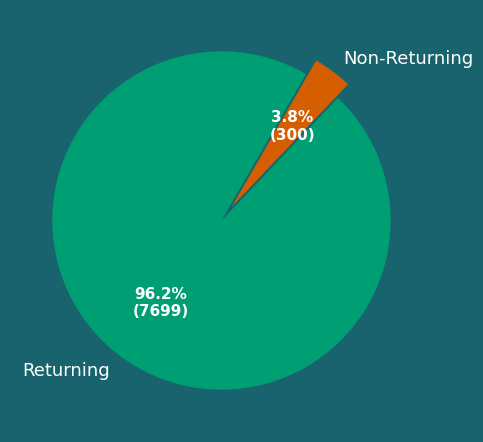

In [29]:
# Create the pie chart
colors = ["#009E73", "#D55E00"] 
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("#18636d")  # Background color

wedges, texts, autotexts = ax.pie(
    retn_data["No.of Visitors"],
    labels=retn_data["Visitor Type"],
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(retn_data["No.of Visitors"]))})',
    startangle=60,
    explode=[0, 0.1],  # Emphasize Non-Returning Visitors
    colors=colors,
)

# Style the text
plt.setp(autotexts, size=11, weight="bold", color="white")
plt.setp(texts, size=13, color="white")

# Adjust text placement for small wedge (Non-Returning Visitors)
for i, autotext in enumerate(autotexts):
    if retn_data["Visitor Type"][i] == "Non-Returning Visitors":  
        autotext.set_rotation(90)  # Rotate text vertically
        
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------------------

### <p style="background-color:#18636d; font-family:calibri; color:#00c49a;padding:10px; font-size:150%; text-align:center; border-radius:50px 50px;"> CUSTOMER EFFECTIVENESS</p>
# --------------------------------------------------------------------------------------------

#### UNIVARIATE ANALYSIS
##### Campaign Channel and Type Distribution

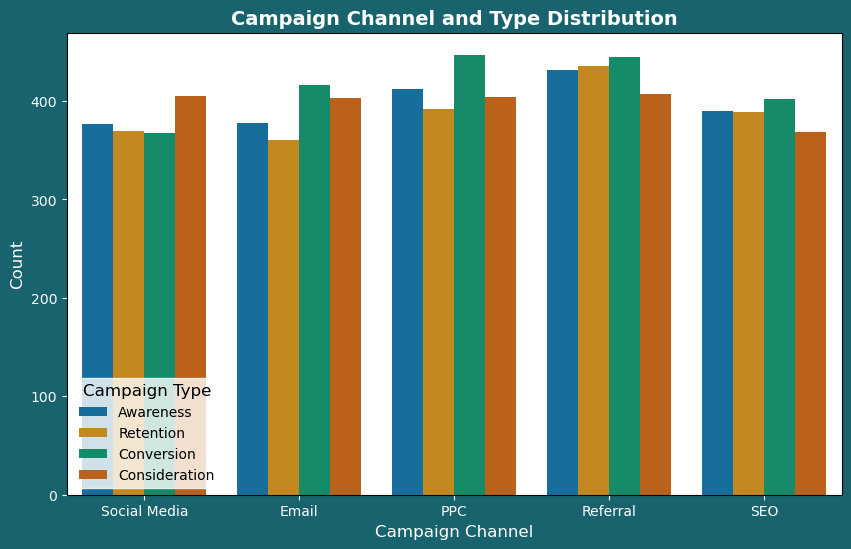

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("#18636d")  # Background color

# Count plot for Campaign Channel and Type Distribution
sns.countplot(x='CampaignChannel', hue='CampaignType', data=data, ax=ax, palette="colorblind")
ax.set_title("Campaign Channel and Type Distribution", fontsize=14, fontweight="bold", color="white")
ax.set_xlabel("Campaign Channel", fontsize=12, color="white")
ax.set_ylabel("Count", fontsize=12, color="white")
ax.tick_params(axis='both', colors="white")
ax.legend(title="Campaign Type", title_fontsize=12, fontsize=10, edgecolor="white",loc="lower left")
plt.show()

##### Ad. Spend and Click Throught Rate(CTR) Distribution

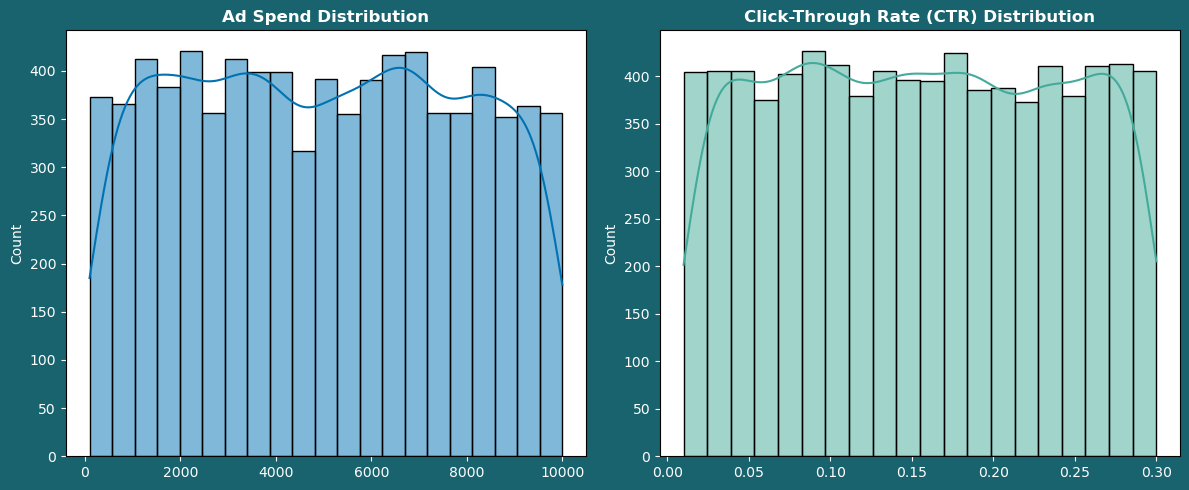

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.patch.set_facecolor("#18636d")  # Background color

# Histograms for Ad Spend and Click-Through Rate (CTR)
sns.histplot(data['AdSpend'], ax=ax[0], color="#0072B2", kde=True)
sns.histplot(data['ClickThroughRate'], ax=ax[1], color="#44AA99", kde=True)

# Titles for each plot
ax[0].set_title("Ad Spend Distribution", fontsize=12, fontweight="bold", color="white")
ax[1].set_title("Click-Through Rate (CTR) Distribution", fontsize=12, fontweight="bold", color="white")

# Adjust labels and ticks
for a in ax:
    a.set_xlabel("")
    a.set_ylabel("Count", fontsize=10, color="white")
    a.tick_params(axis='both', colors="white")
    
plt.tight_layout()
plt.show()

#### BIVARIATE ANALYSIS
##### CTR vs. Conversion

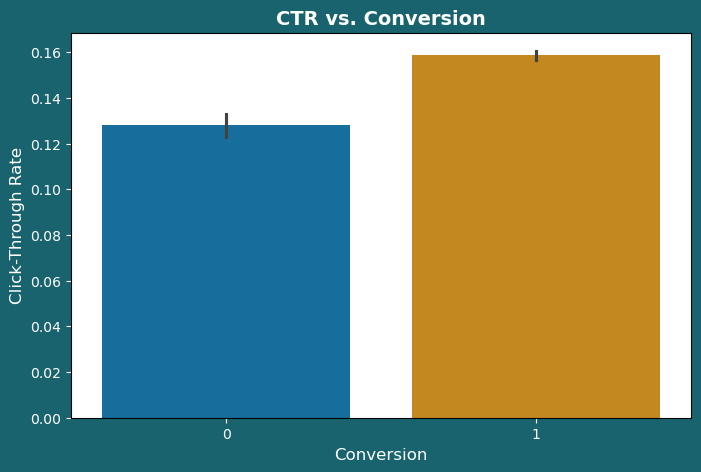

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor("#18636d")  # Background color

sns.barplot(x='Conversion', y='ClickThroughRate', data=data, ax=ax, palette="colorblind")
ax.set_title("CTR vs. Conversion", fontsize=14, fontweight="bold", color="white")
ax.set_xlabel("Conversion", fontsize=12, color="white")
ax.set_ylabel("Click-Through Rate", fontsize=12, color="white")
ax.tick_params(axis='both', colors="white")
plt.show()

##### Conversion by Campaign Type and Channel 

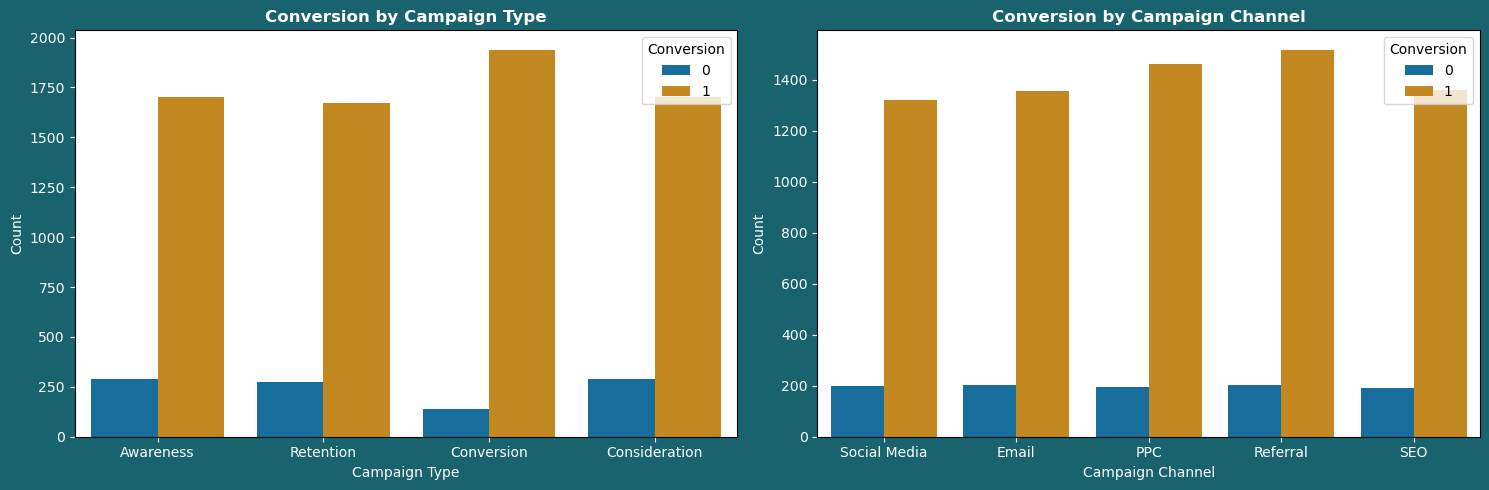

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # Two subplots side by side
fig.patch.set_facecolor("#18636d")  # Background color

# Conversion by Campaign Type
sns.countplot(x='CampaignType', hue='Conversion', data=data, ax=ax[0], palette="colorblind")
ax[0].set_title("Conversion by Campaign Type", fontsize=12, fontweight="bold", color="white")
ax[0].set_xlabel("Campaign Type", fontsize=10, color="white")
ax[0].set_ylabel("Count", fontsize=10, color="white")
ax[0].tick_params(axis='both', colors="white")

# Conversion by Campaign Channel
sns.countplot(x='CampaignChannel', hue='Conversion', data=data, ax=ax[1], palette="colorblind")
ax[1].set_title("Conversion by Campaign Channel", fontsize=12, fontweight="bold", color="white")
ax[1].set_xlabel("Campaign Channel", fontsize=10, color="white")
ax[1].set_ylabel("Count", fontsize=10, color="white")
ax[1].tick_params(axis='both', colors="white")

plt.tight_layout()
plt.show()

##### Total Ad Spend vs. Conversion

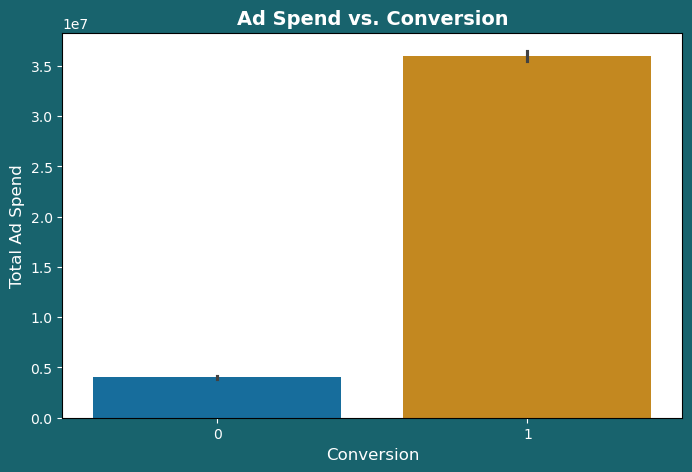

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor("#18636d")  # Background color

sns.barplot(x='Conversion', y='AdSpend', data=data, ax=ax, palette="colorblind", estimator=sum)
ax.set_title("Ad Spend vs. Conversion", fontsize=14, fontweight="bold", color="white")
ax.set_xlabel("Conversion", fontsize=12, color="white")
ax.set_ylabel("Total Ad Spend", fontsize=12, color="white")
ax.tick_params(axis='both', colors="white")
plt.show()

# Key Observation 
### Customer Demographics
- **Age Distribution**: The majority of customers are aged 35-44, with most conversions occurring in this age group, suggesting that middle-aged customers are a crucial target for campaigns.
- **Income Distribution**: Higher-income customers are more likely to convert, making ad spend optimization crucial. Conversion rates peak between $100K-$150K, with the least in $0-$25K.
- **Gender**: The gender disparity in conversion and non-conversion rates suggests that gender may not be a significant factor in targeting strategies.

### Customer Engagement
- **Website Engagement**:Website visits are frequent but shallow, with average time on site higher for converters (7.93 minutes) than non-converters (6.27 minutes), suggesting engagement duration as a potential conversion predictor.
- **Loyalty and Retention**: Average loyalty points are higher for converters (2,500) than non-converters (2,200), and 96.2% of customers are returning visitors, emphasizing the importance of repeat engagement in driving conversions.
- **Social vs. Email**:The study reveals that converters earn 2,500 more loyalty points than non-converters and 96.2% of customers are repeat visitors, highlighting the significance of repeat engagement in driving conversions.
- **Click-Through Rate (CTR)**: The study reveals that low click engagement is strongly associated with non-conversion, a crucial metric for campaign refinement, primarily occurring in the 0.00-0.13 CTR range.
- **Campaign Channels and Types**: The study reveals that awareness, retention, and consideration channels have high non-conversion rates, while conversion channels have balanced outcomes, and referral campaigns lead to conversions.

### Key Insights
- **Targeting Opportunity**:The 35-44 age group and $100K-$150K income bracket are prime targets for focused ad spend due to higher conversion rates.
- **Engagement Focus**: The study reveals that longer site visits and higher loyalty points significantly differentiate converts, suggesting campaigns should prioritize retaining engaged, loyal customers.
- **Channel Strategy**:Referral campaigns outperform others in conversions, while social engagement outperforms email, guiding resource allocation to maximize ROAS.
- **Conversion Barriers**: Low CTR (0.00-0.13) and non-conversion-heavy channels (Awareness, Retention) indicate areas for campaign improvement to boost conversion rates.

### <p style="background-color:#18636d; font-family:calibri; color:#00c49a;padding:10px; font-size:150%; text-align:center; border-radius:50px 50px;">Step 5 | PREPROCESSING and FEATURES ENGINEERING</p>
# --------------------------------------------------------------------------------------------

## Data Preprocessing

This section prepares a dataset for machine learning to predict customer conversions effectively, optimizing features for model performance and campaign targeting. Steps include data relevance, feature distribution, categorical handling, scaling, and class imbalance.

### Preprocessing Steps
- **Drop Irrelevant Column**: Removed `CustomerID` as it’s a unique identifier with no predictive value, reducing noise in the dataset.
- **Binning Numerical Features**: Binned `Age`, `Income`, `AdSpend`, and `TimeOnSite` into 5 quantile-based groups (e.g., `Age_Bin`, `Income_Bin`) using `pd.qcut`, smoothing continuous data into categorical ranges for better model interpretability.
- **Encoding Categorical Variables**: Applied `LabelEncoder` to transform categorical columns (`Gender`, `CampaignChannel`, `CampaignType`, `AdvertisingPlatform`, `AdvertisingTool`) and binned features (`Age_Bin`, etc.) into numerical values, enabling model compatibility.
- **Feature-Target Separation**: Split the dataset into features (`X`) by dropping `Conversion` and target (`y` as `Conversion`), setting up for supervised learning.
- **Scaling Features**: Used `StandardScaler` to standardize all features in `X`, ensuring uniform scale (mean=0, variance=1) to support models sensitive to feature magnitude.
- **Handle Class Imbalance**: Applied SMOTE (Synthetic Minority Oversampling Technique) to balance the `Conversion` classes, generating synthetic samples to equalize converters and non-converters for unbiased learning.
- **Train-Test Split**: Divided the balanced data into 80% training (`X_train`, `y_train`) and 20% testing (`X_test`, `y_test`) sets with a random state of 42, ensuring consistent evaluation.

### Key Insights and Observations
- **Relevance Focus**: Dropping `CustomerID` streamlined the dataset, keeping only conversion-relevant features, critical for efficient targeting.
- **Feature Enhancement**: Binning reduced noise in numerical features (e.g., `Age` from continuous to 5 groups), aligning with EDA findings like the 35-44 age range dominance, aiding model capture of demographic trends.
- **Categorical Readiness**: Encoding ensured categorical data (e.g., `CampaignChannel`) was usable, preserving insights like Referral channel effectiveness for prediction.
- **Balanced Learning**: SMOTE addressed the likely initial imbalance in `Conversion` (fewer converters), improving model ability to predict rare conversions, vital for increasing conversion rates.
- **Scale Consistency**: Scaling normalized features like `TimeOnSite` (7.93 vs. 6.27 minutes for converters vs. non-converters), enhancing model sensitivity to engagement differences.

These steps create a clean, balanced, and standardized dataset, enabling the model to accurately identify conversion patterns (e.g., high-income, engaged customers). This supports precise campaign targeting and optimizes ad spend by focusing on predictive features identified in EDA, such as time on site and loyalty points.

###### Note: Re-run (Load dataset) before preprocessing

In [35]:
# Load the Dataset
data = pd.read_csv('digital_marketing_campaign_dataset.csv')

In [36]:
# Drop Irreverent Column (CustomerID)
data = data.drop('CustomerID', axis=1)

##### Binning

In [37]:
# Binning
data['Age_Bin'] = pd.qcut(data['Age'], q=5, labels=False)
data['Income_Bin'] = pd.qcut(data['Income'], q=5, labels=False)
data['AdSpend_Bin'] = pd.qcut(data['AdSpend'], q=5, labels=False)
data['TimeOnSite_Bin'] = pd.qcut(data['TimeOnSite'], q=5, labels=False)

<div style="border-radius:10px; padding: 15px; background-color: #18636d; font-size:120%; text-align:left">

<h2 align="left"><font color=#00c49a >Binning Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __Age_Bin__ | Binned age group (0-4, from qcut with 5 quantiles). |
| __Income_Bin__ | Binned income group (0-4, from qcut with 5 quantiles). |
| __AdSpend_Bin__ | Binned ad spend  group (0-4, from qcut with 5 quantiles). |
| __TimeOnSite_Bin__ | Binned time on site group (0-4, from qcut with 5 quantiles). |

#####  Encoding Categorical Variables

In [38]:
# Encode categorical variables
cat_columns = ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool',
               'Age_Bin', 'Income_Bin', 'AdSpend_Bin', 'TimeOnSite_Bin']
le = LabelEncoder()
for col in cat_columns:
    data[col] = le.fit_transform(data[col])

#####  Define Feature and Target

In [39]:
# Separate features and target
X = data.drop('Conversion', axis=1)
y = data['Conversion']

#####  Scale the Numerical Features

In [40]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#####  Handle Class Imblance using SMOTE

In [41]:
# Handle Class Imbalance with SMOTE 
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

##### Split Train and Test

In [42]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


### <p style="background-color:#18636d; font-family:calibri; color:#00c49a;padding:10px; font-size:150%; text-align:center; border-radius:50px 50px;">Step 6 | MODEL TRANING and EVALUATION </p>
# --------------------------------------------------------------------------------------------

##### This section Trains and evaluates multiple machine learning models to predict customer conversions, selecting the best one to enhance campaign targeting, increase conversion rates, and maximize return on advertising spend (ROAS). We have base and tuned versions of classifiers using a comprehensive set of metrics and visualizations, ensuring a robust model for deployment.

##### Step 6.1 | Create Function for Evaluation and Plot of Model results 

In [43]:
# Initialize model_metrics as a global dictionary 
model_metrics = {}

# Function to evaluate and plot results
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test, tune=False, param_grid=None):
    global model_metrics  # Access the global dictionary
    
    if tune and param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"{model_name} Best Hyperparameters: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store metrics in the global model_metrics dictionary
    model_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='tab10')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature Importance 
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        feature_names = X.columns
        feat_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feat_importance = feat_importance.sort_values('Importance', ascending=False)

        plt.figure(figsize=(12, 6))
        sns.barplot(x='Importance', y='Feature', data=feat_importance, palette='colorblind')
        plt.title(f'{model_name} Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

    # 5-Fold Cross-Validation Scores
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    print(f"\n{model_name} 5-Fold Cross-Validation Scores:")
    print(f"Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
    print(f"Standard Deviation: {cv_scores.std():.4f}")

    # Precision-Recall Curve
    if hasattr(best_model, 'predict_proba'):
        y_proba = best_model.predict_proba(X_test)[:, 1]  # Probability for the positive class
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
        avg_precision = average_precision_score(y_test, y_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(recall_curve, precision_curve, label=f'{model_name} (AP = {avg_precision:.2f})', color='blue')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model_name} Precision-Recall Curve')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()
    else:
        print(f"{model_name}: Precision-Recall Curve not available (no predict_proba method)")
    
    return best_model

##### Step 6.2 | Model Traning

#####  6.2.1 | Logistic Regression (Ridge)

In [44]:
# Logistic Regression (Ridge) - Training
lr_ridge = LogisticRegression(penalty='l2', C=0.1, max_iter=1000, random_state=42)


Logistic Regression (Ridge) Base Performance:
Accuracy: 0.7376
F1 Score: 0.7364
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1377
           1       0.75      0.72      0.74      1428

    accuracy                           0.74      2805
   macro avg       0.74      0.74      0.74      2805
weighted avg       0.74      0.74      0.74      2805



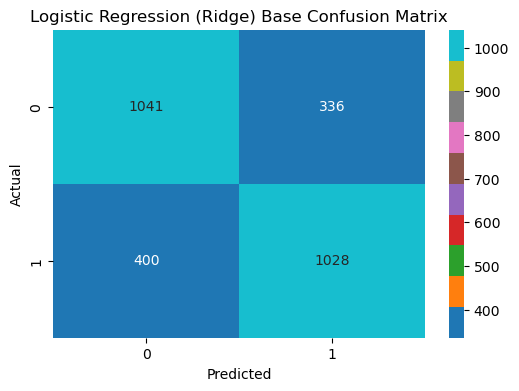


Logistic Regression (Ridge) Base 5-Fold Cross-Validation Scores:
Scores: [0.73975045 0.73573975 0.73663102 0.73885918 0.75033437]
Mean CV Accuracy: 0.7403
Standard Deviation: 0.0052


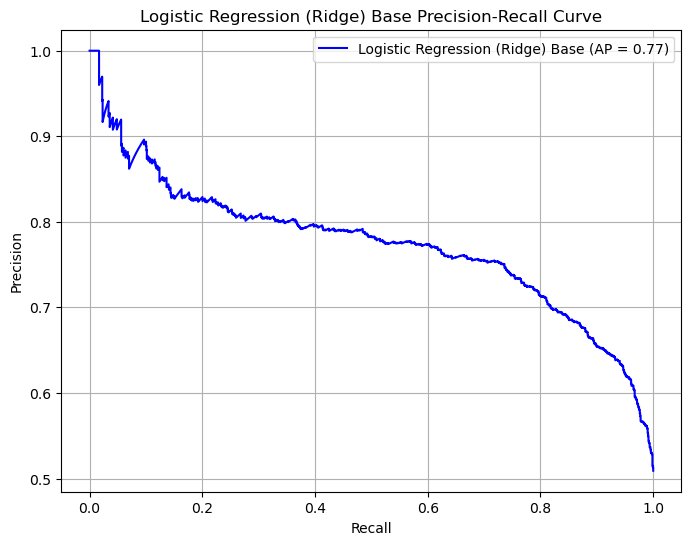

In [45]:
# Logistic Regression (Ridge) - Base Evaluation
lr_ridge_base = evaluate_model('Logistic Regression (Ridge) Base', lr_ridge, X_train, X_test, y_train, y_test)

In [46]:
# Logistic Regression (Ridge) - Hyperparameter Grid
lr_ridge_param_grid = {
    'C': [0.01, 0.1, 1.0]
}

Logistic Regression (Ridge) Tuned Best Hyperparameters: {'C': 1.0}

Logistic Regression (Ridge) Tuned Performance:
Accuracy: 0.7398
F1 Score: 0.7389
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1377
           1       0.76      0.72      0.74      1428

    accuracy                           0.74      2805
   macro avg       0.74      0.74      0.74      2805
weighted avg       0.74      0.74      0.74      2805



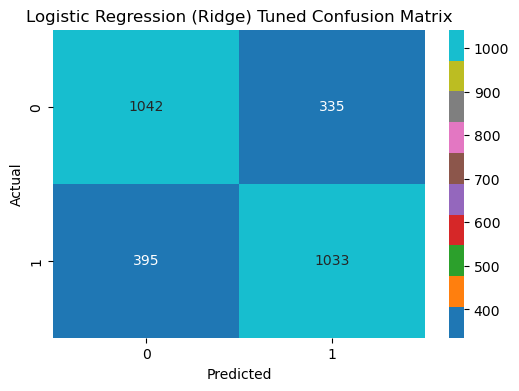


Logistic Regression (Ridge) Tuned 5-Fold Cross-Validation Scores:
Scores: [0.73796791 0.73618538 0.73796791 0.73930481 0.75167187]
Mean CV Accuracy: 0.7406
Standard Deviation: 0.0056


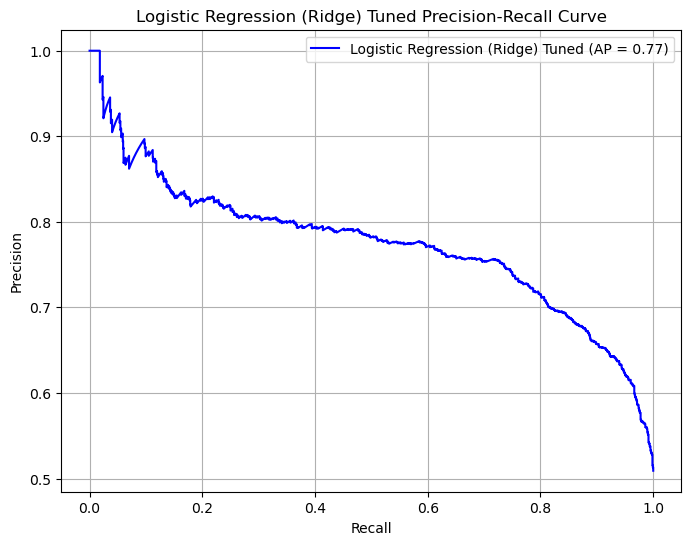

In [47]:
# Logistic Regression (Ridge) - Tuned Evaluation
lr_ridge_tuned = evaluate_model('Logistic Regression (Ridge) Tuned', lr_ridge, X_train, X_test, y_train, y_test, tune=True, param_grid=lr_ridge_param_grid)

#####  6.2.2 | Logistic Regression (Lasso)

In [48]:
# Logistic Regression (Lasso) - Training
lr_lasso = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', max_iter=1000, random_state=42)


Logistic Regression (Lasso) Base Performance:
Accuracy: 0.7344
F1 Score: 0.7333
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1377
           1       0.75      0.72      0.73      1428

    accuracy                           0.73      2805
   macro avg       0.73      0.73      0.73      2805
weighted avg       0.74      0.73      0.73      2805



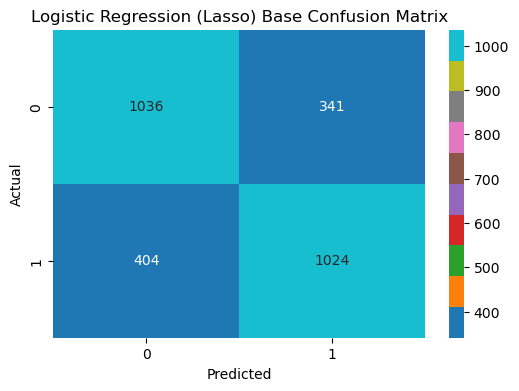


Logistic Regression (Lasso) Base 5-Fold Cross-Validation Scores:
Scores: [0.73618538 0.73975045 0.74019608 0.73796791 0.74899688]
Mean CV Accuracy: 0.7406
Standard Deviation: 0.0044


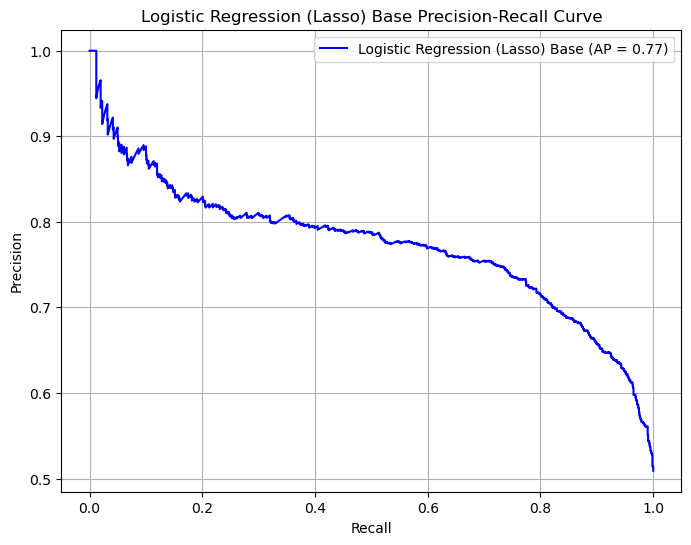

In [49]:
# Logistic Regression (Lasso) - Base Evaluation
lr_lasso_base = evaluate_model('Logistic Regression (Lasso) Base', lr_lasso, X_train, X_test, y_train, y_test)

In [50]:
# Logistic Regression (Lasso) - Hyperparameter Grid
lr_lasso_param_grid = {
    'C': [0.01, 0.1, 1.0]
}

Logistic Regression (Lasso) Tuned Best Hyperparameters: {'C': 1.0}

Logistic Regression (Lasso) Tuned Performance:
Accuracy: 0.7394
F1 Score: 0.7386
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1377
           1       0.75      0.72      0.74      1428

    accuracy                           0.74      2805
   macro avg       0.74      0.74      0.74      2805
weighted avg       0.74      0.74      0.74      2805



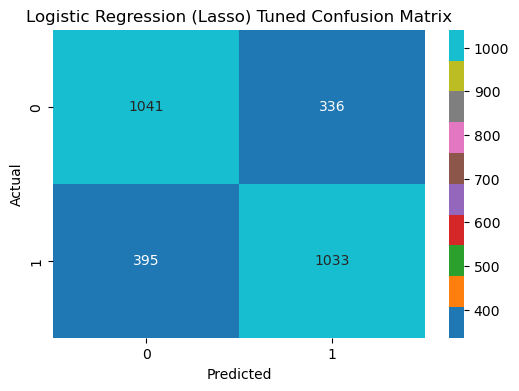


Logistic Regression (Lasso) Tuned 5-Fold Cross-Validation Scores:
Scores: [0.74019608 0.73707665 0.73618538 0.74019608 0.75122604]
Mean CV Accuracy: 0.7410
Standard Deviation: 0.0054


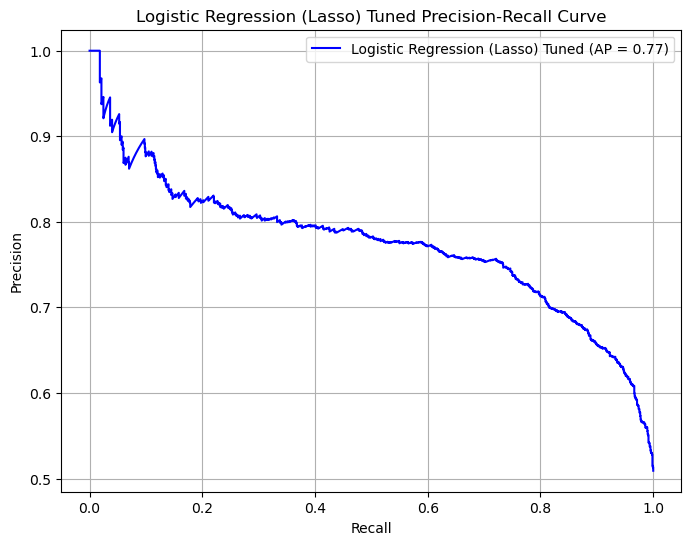

In [51]:
# Logistic Regression (Lasso) - Tuned Evaluation
lr_lasso_tuned = evaluate_model('Logistic Regression (Lasso) Tuned', lr_lasso, X_train, X_test, y_train, y_test, tune=True, param_grid=lr_lasso_param_grid)

#####  6.2.3 | Decision Tree

In [52]:
# Decision Tree - Training
dt = DecisionTreeClassifier(max_depth=5, random_state=42)


Decision Tree Base Performance:
Accuracy: 0.7537
F1 Score: 0.7707
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1377
           1       0.73      0.81      0.77      1428

    accuracy                           0.75      2805
   macro avg       0.76      0.75      0.75      2805
weighted avg       0.76      0.75      0.75      2805



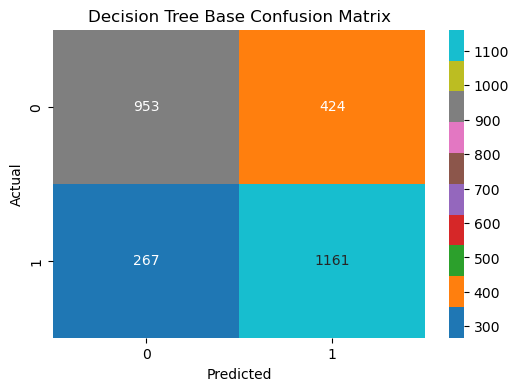

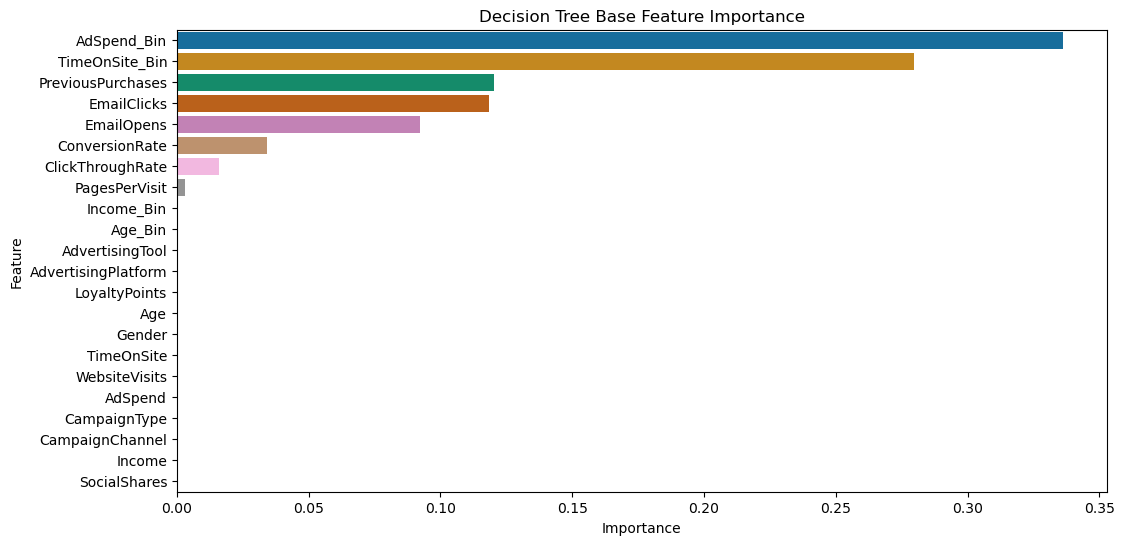


Decision Tree Base 5-Fold Cross-Validation Scores:
Scores: [0.71702317 0.76426025 0.73395722 0.75757576 0.73205528]
Mean CV Accuracy: 0.7410
Standard Deviation: 0.0174


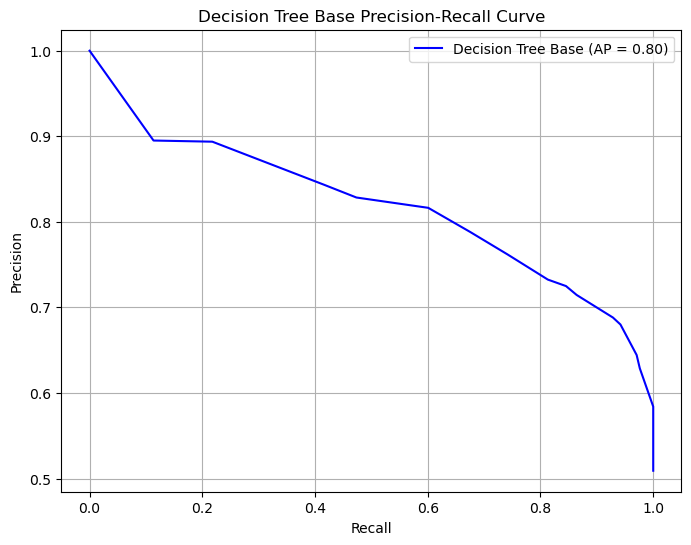

In [53]:
# Decision Tree - Base Evaluation
dt_base = evaluate_model('Decision Tree Base', dt, X_train, X_test, y_train, y_test)

In [54]:
# Decision Tree - Hyperparameter Grid
dt_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

Decision Tree Tuned Best Hyperparameters: {'max_depth': 7, 'min_samples_split': 2}

Decision Tree Tuned Performance:
Accuracy: 0.7925
F1 Score: 0.7978
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1377
           1       0.79      0.80      0.80      1428

    accuracy                           0.79      2805
   macro avg       0.79      0.79      0.79      2805
weighted avg       0.79      0.79      0.79      2805



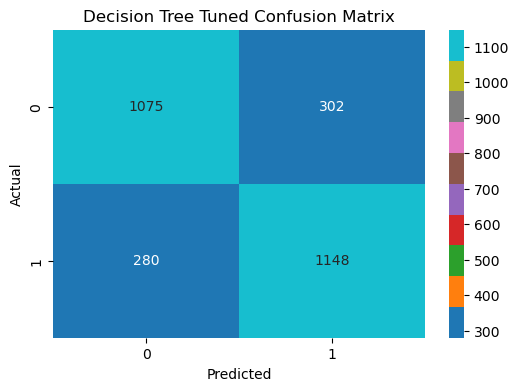

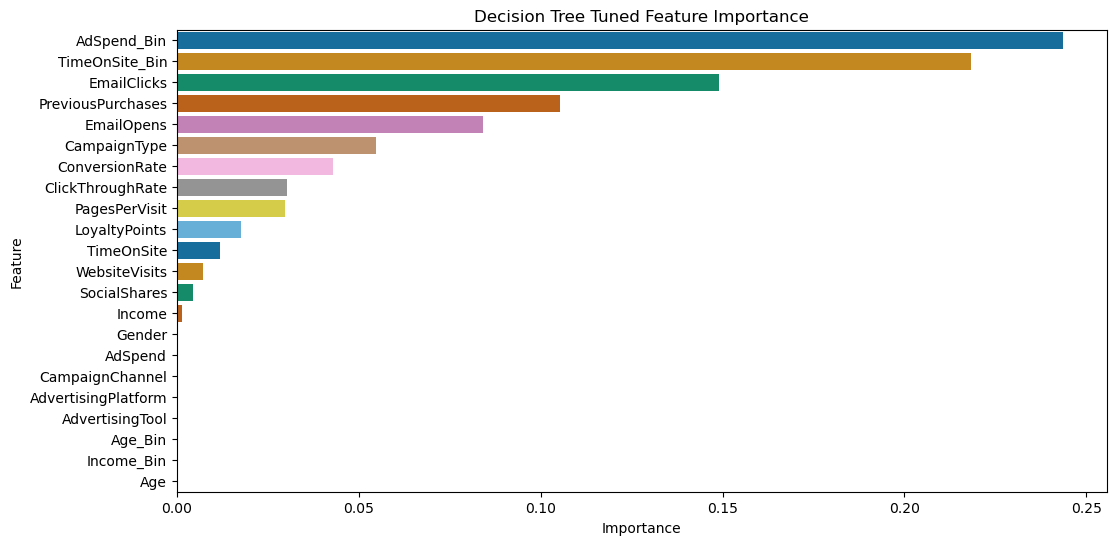


Decision Tree Tuned 5-Fold Cross-Validation Scores:
Scores: [0.76336898 0.83244207 0.79590018 0.78921569 0.8087383 ]
Mean CV Accuracy: 0.7979
Standard Deviation: 0.0227


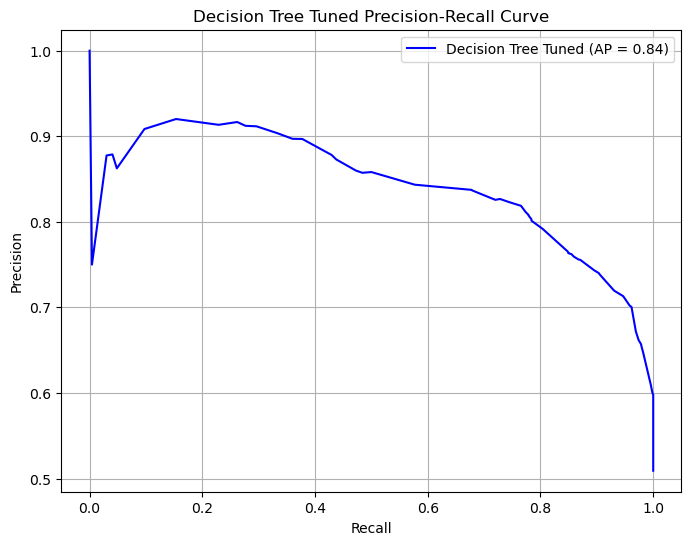

In [55]:
# Decision Tree - Tuned Evaluation
dt_tuned = evaluate_model('Decision Tree Tuned', dt, X_train, X_test, y_train, y_test, tune=True, param_grid=dt_param_grid)

#####  6.2.4 | Random Forest

In [56]:
# Random Forest - Training
rf = RandomForestClassifier(random_state=42)


Random Forest Base Performance:
Accuracy: 0.9629
F1 Score: 0.9635
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1377
           1       0.97      0.96      0.96      1428

    accuracy                           0.96      2805
   macro avg       0.96      0.96      0.96      2805
weighted avg       0.96      0.96      0.96      2805



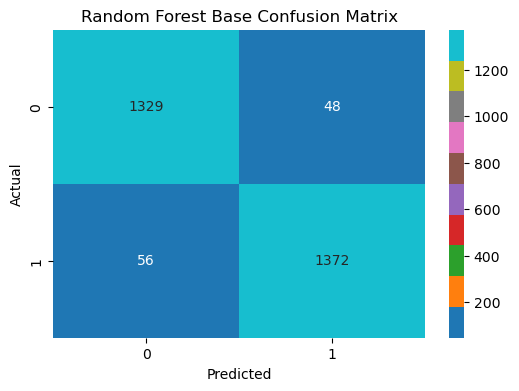

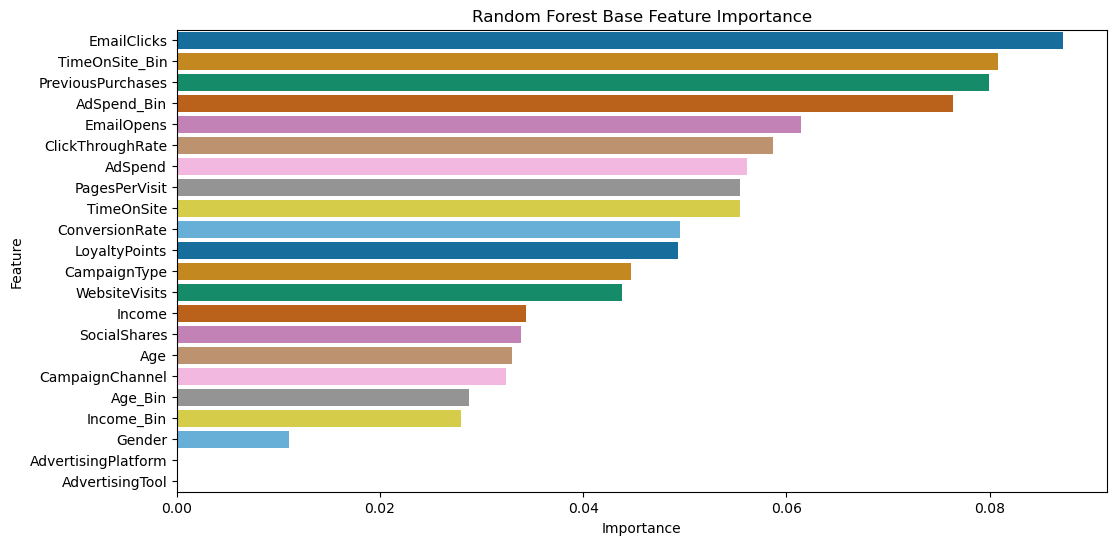


Random Forest Base 5-Fold Cross-Validation Scores:
Scores: [0.95900178 0.95855615 0.95677362 0.95766488 0.96210432]
Mean CV Accuracy: 0.9588
Standard Deviation: 0.0018


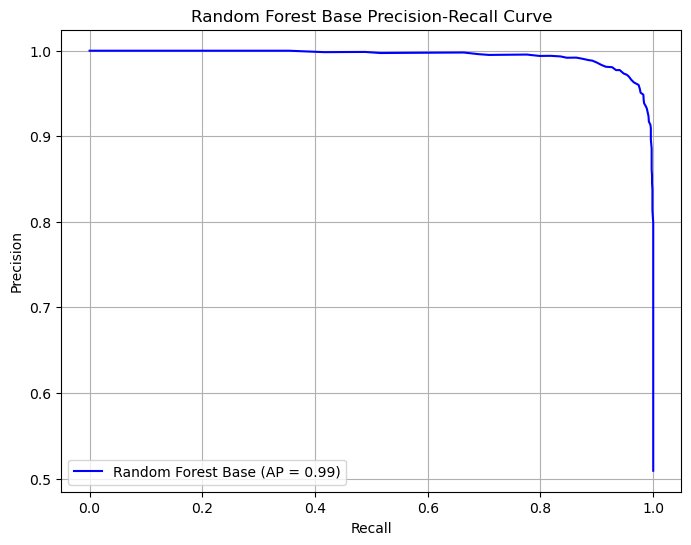

In [57]:
# Random Forest - Base Evaluation
rf_base = evaluate_model('Random Forest Base', rf, X_train, X_test, y_train, y_test)

In [58]:
# Random Forest - Hyperparameter Grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Random Forest Tuned Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Random Forest Tuned Performance:
Accuracy: 0.9697
F1 Score: 0.9703
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1377
           1       0.97      0.97      0.97      1428

    accuracy                           0.97      2805
   macro avg       0.97      0.97      0.97      2805
weighted avg       0.97      0.97      0.97      2805



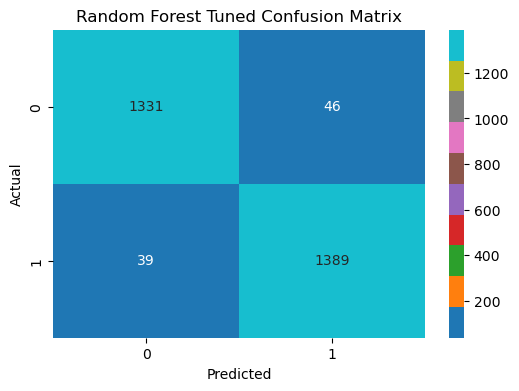

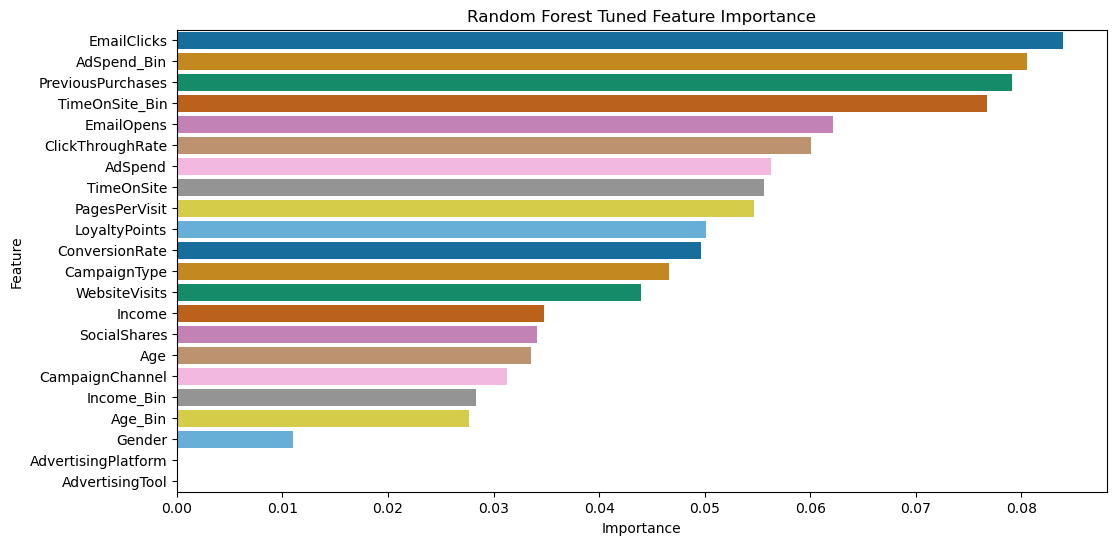


Random Forest Tuned 5-Fold Cross-Validation Scores:
Scores: [0.95989305 0.96256684 0.95588235 0.95944742 0.96477931]
Mean CV Accuracy: 0.9605
Standard Deviation: 0.0030


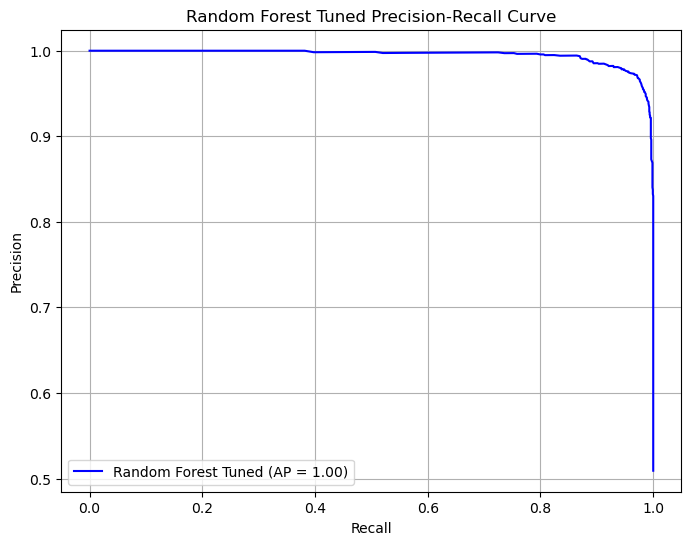

In [59]:
# Random Forest - Tuned Evaluation
rf_tuned = evaluate_model('Random Forest Tuned', rf, X_train, X_test, y_train, y_test, tune=True, param_grid=rf_param_grid)

#####  6.2.5 | Support Vector Classifier (SVC)

In [60]:
# SVC - Training
svc = SVC(C=0.5, kernel='rbf', random_state=42)


SVC Base Performance:
Accuracy: 0.8292
F1 Score: 0.8310
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1377
           1       0.84      0.82      0.83      1428

    accuracy                           0.83      2805
   macro avg       0.83      0.83      0.83      2805
weighted avg       0.83      0.83      0.83      2805



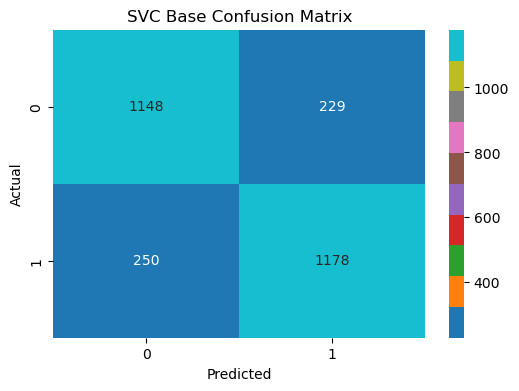


SVC Base 5-Fold Cross-Validation Scores:
Scores: [0.81684492 0.8097148  0.82130125 0.81818182 0.82567989]
Mean CV Accuracy: 0.8183
Standard Deviation: 0.0053
SVC Base: Precision-Recall Curve not available (no predict_proba method)


In [61]:
# SVC - Base Evaluation
svc_base = evaluate_model('SVC Base', svc, X_train, X_test, y_train, y_test)

In [62]:
# SVC - Hyperparameter Grid
svc_param_grid = {
    'C': [0.1, 0.5, 1.0],
    'kernel': ['rbf', 'linear']
}

SVC Tuned Best Hyperparameters: {'C': 1.0, 'kernel': 'rbf'}

SVC Tuned Performance:
Accuracy: 0.8545
F1 Score: 0.8525
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1377
           1       0.88      0.83      0.85      1428

    accuracy                           0.85      2805
   macro avg       0.86      0.86      0.85      2805
weighted avg       0.86      0.85      0.85      2805



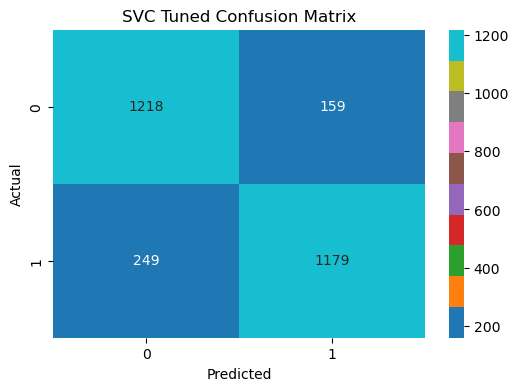


SVC Tuned 5-Fold Cross-Validation Scores:
Scores: [0.84848485 0.83734403 0.85294118 0.84848485 0.85465894]
Mean CV Accuracy: 0.8484
Standard Deviation: 0.0060
SVC Tuned: Precision-Recall Curve not available (no predict_proba method)


In [63]:
# SVC - Tuned Evaluation
svc_tuned = evaluate_model('SVC Tuned', svc, X_train, X_test, y_train, y_test, tune=True, param_grid=svc_param_grid)

#####  6.2.6 | XGBoost

In [64]:
# XGBoost - Training
xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, reg_lambda=1.0, random_state=42, use_label_encoder=False, eval_metric='logloss')


XGBoost Base Performance:
Accuracy: 0.9565
F1 Score: 0.9582
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1377
           1       0.94      0.98      0.96      1428

    accuracy                           0.96      2805
   macro avg       0.96      0.96      0.96      2805
weighted avg       0.96      0.96      0.96      2805



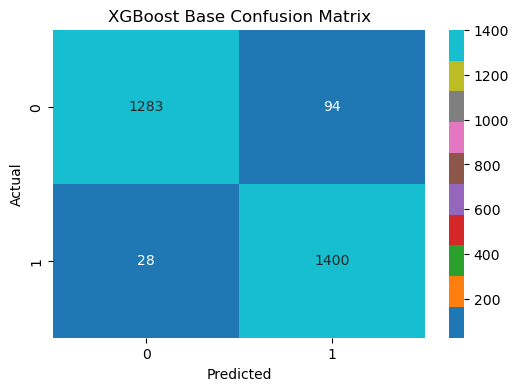

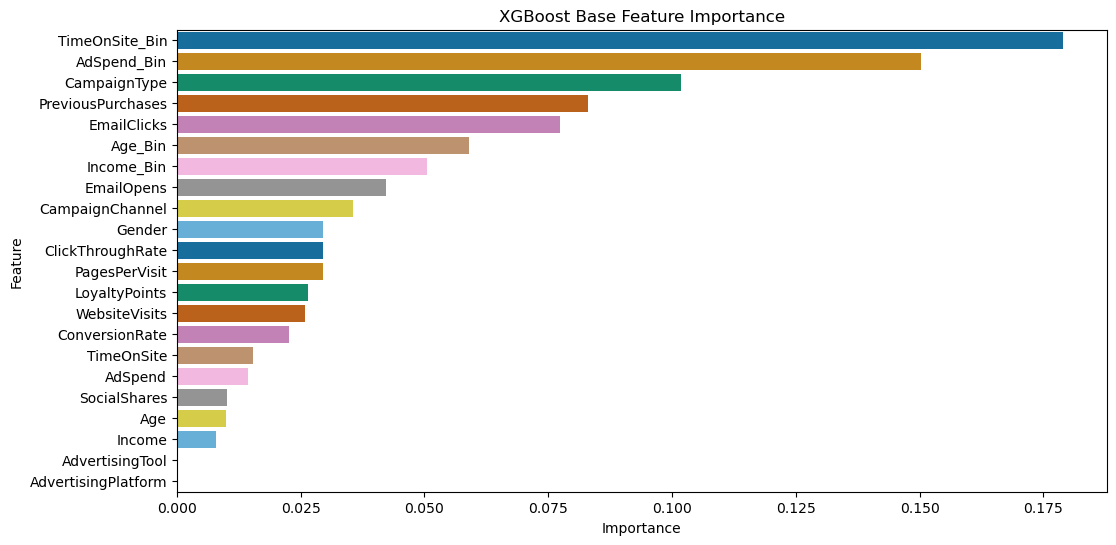


XGBoost Base 5-Fold Cross-Validation Scores:
Scores: [0.95231729 0.95409982 0.94875223 0.95766488 0.95274186]
Mean CV Accuracy: 0.9531
Standard Deviation: 0.0029


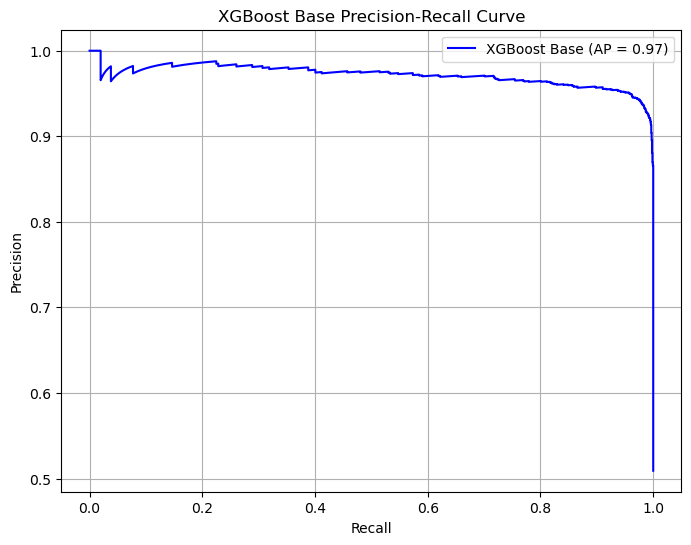

In [65]:
# XGBoost - Base Evaluation
xgb_base = evaluate_model('XGBoost Base', xgb_model, X_train, X_test, y_train, y_test)

In [66]:
# XGBoost - Hyperparameter Grid
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

XGBoost Tuned Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

XGBoost Tuned Performance:
Accuracy: 0.9608
F1 Score: 0.9623
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1377
           1       0.94      0.98      0.96      1428

    accuracy                           0.96      2805
   macro avg       0.96      0.96      0.96      2805
weighted avg       0.96      0.96      0.96      2805



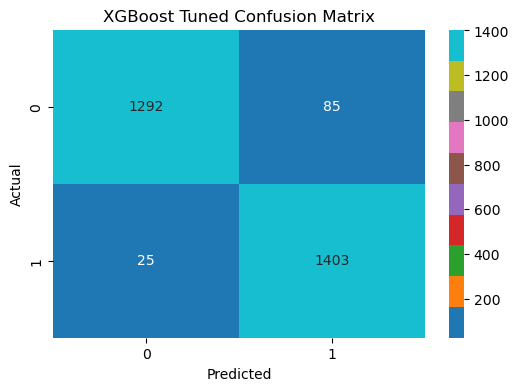

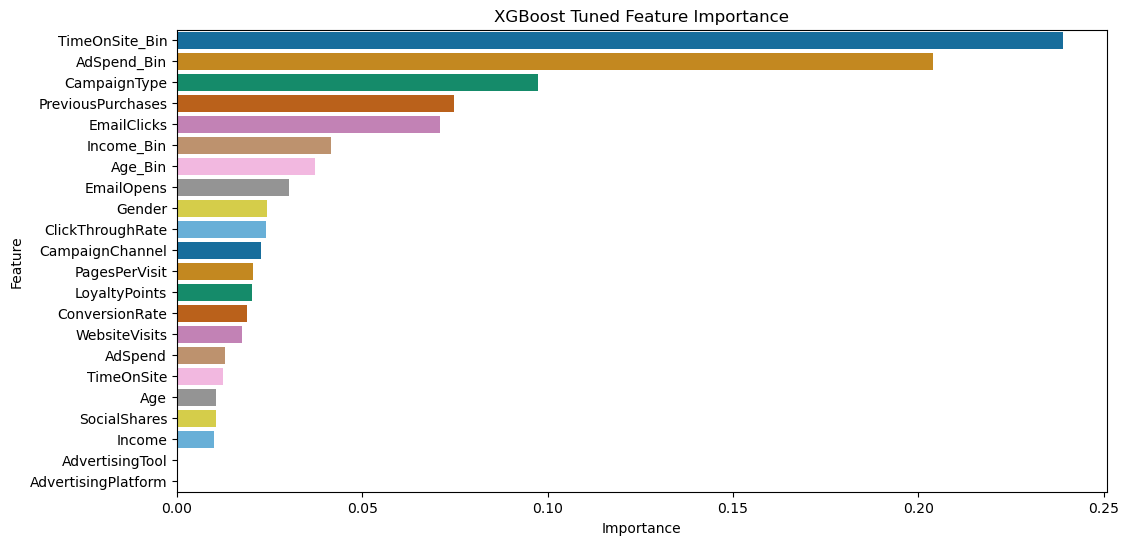


XGBoost Tuned 5-Fold Cross-Validation Scores:
Scores: [0.95811052 0.95632799 0.95008913 0.96078431 0.960321  ]
Mean CV Accuracy: 0.9571
Standard Deviation: 0.0039


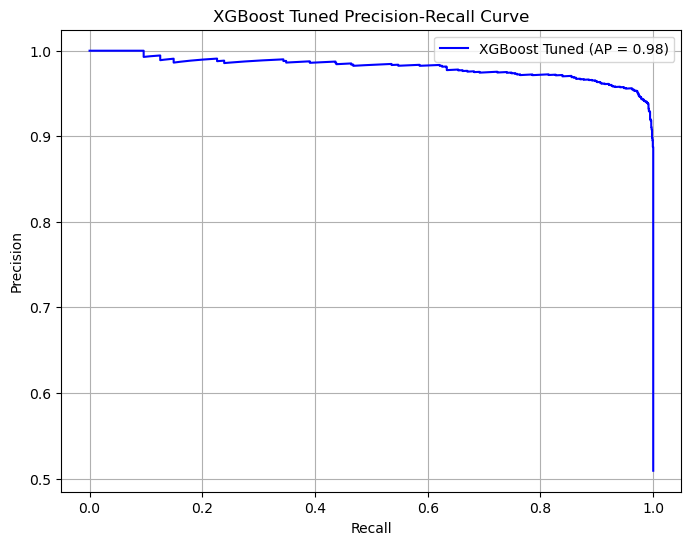

In [67]:
# XGBoost - Tuned Evaluation
xgb_tuned = evaluate_model('XGBoost Tuned', xgb_model, X_train, X_test, y_train, y_test, tune=True, param_grid=xgb_param_grid)

#####  6.2.7 | CatBoost

In [68]:
# CatBoost - Training
cat_model = cb.CatBoostClassifier(depth=6, l2_leaf_reg=3, iterations=100, verbose=0, random_state=42)


CatBoost Base Performance:
Accuracy: 0.9340
F1 Score: 0.9370
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1377
           1       0.91      0.96      0.94      1428

    accuracy                           0.93      2805
   macro avg       0.94      0.93      0.93      2805
weighted avg       0.94      0.93      0.93      2805



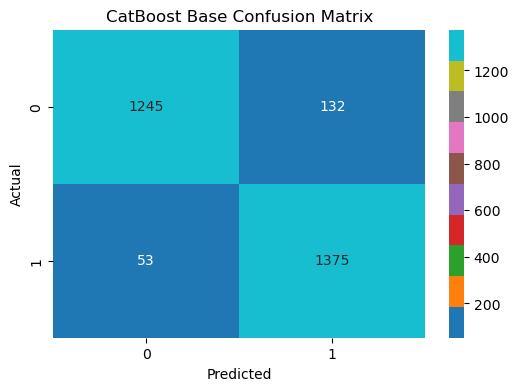

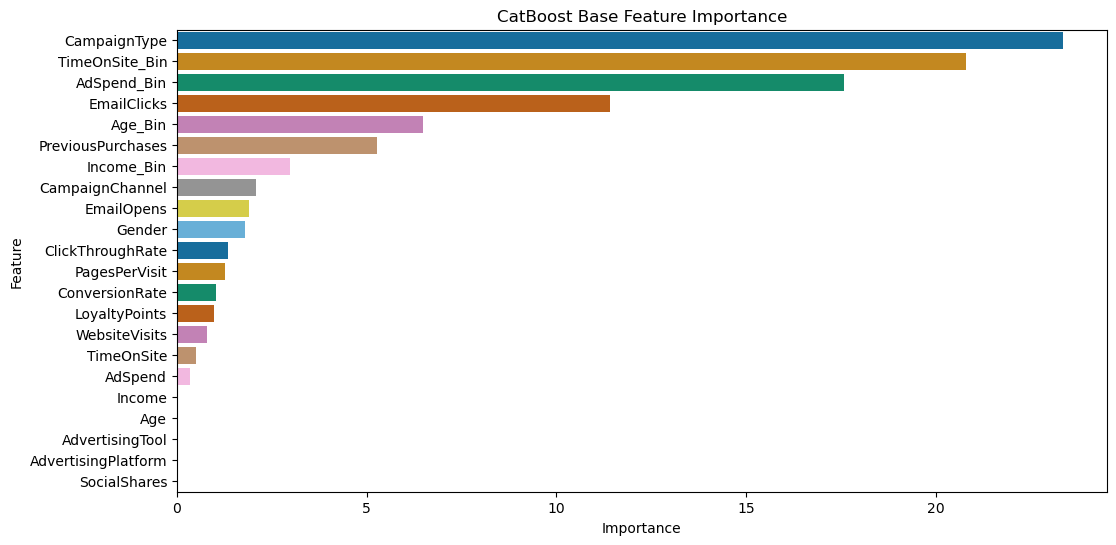


CatBoost Base 5-Fold Cross-Validation Scores:
Scores: [0.93538324 0.93582888 0.93181818 0.93226381 0.93936692]
Mean CV Accuracy: 0.9349
Standard Deviation: 0.0027


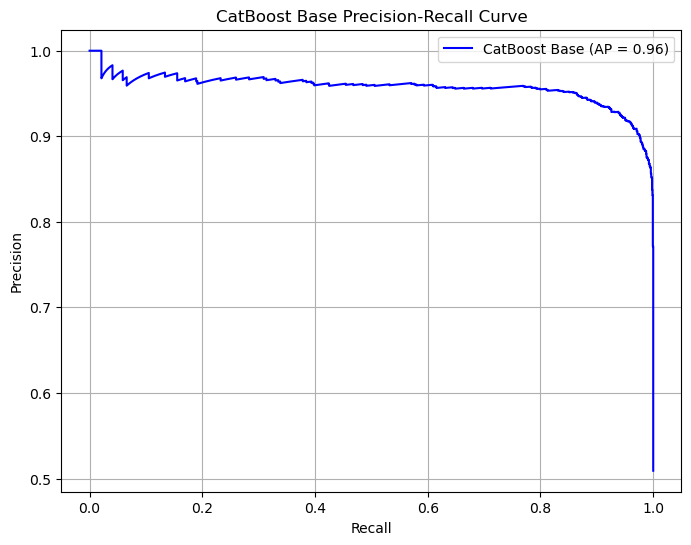

In [69]:
# CatBoost - Base Evaluation
cat_base = evaluate_model('CatBoost Base', cat_model, X_train, X_test, y_train, y_test)

In [70]:
# CatBoost - Hyperparameter Grid
cat_param_grid = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1]
}

CatBoost Tuned Best Hyperparameters: {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}

CatBoost Tuned Performance:
Accuracy: 0.9629
F1 Score: 0.9644
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1377
           1       0.94      0.99      0.96      1428

    accuracy                           0.96      2805
   macro avg       0.96      0.96      0.96      2805
weighted avg       0.96      0.96      0.96      2805



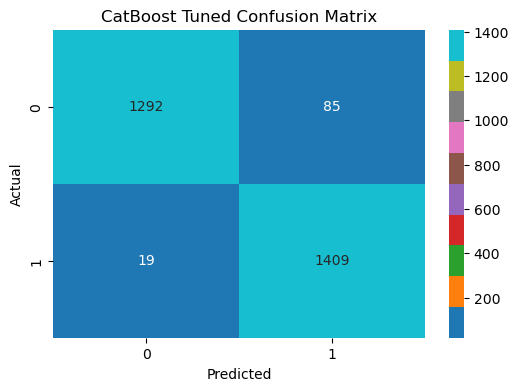

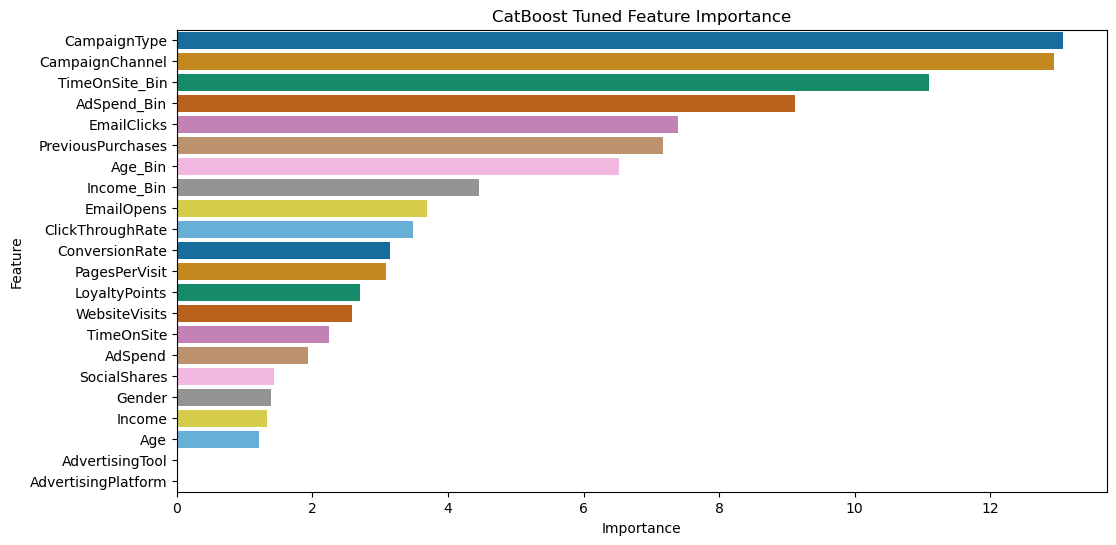


CatBoost Tuned 5-Fold Cross-Validation Scores:
Scores: [0.95855615 0.96033868 0.95588235 0.96301248 0.95720018]
Mean CV Accuracy: 0.9590
Standard Deviation: 0.0025


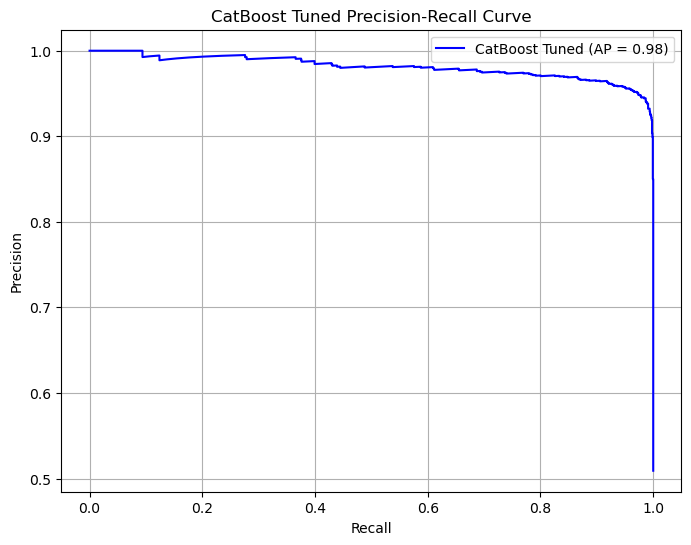

In [71]:
# CatBoost - Tuned Evaluation
cat_tuned = evaluate_model('CatBoost Tuned', cat_model, X_train, X_test, y_train, y_test, tune=True, param_grid=cat_param_grid)

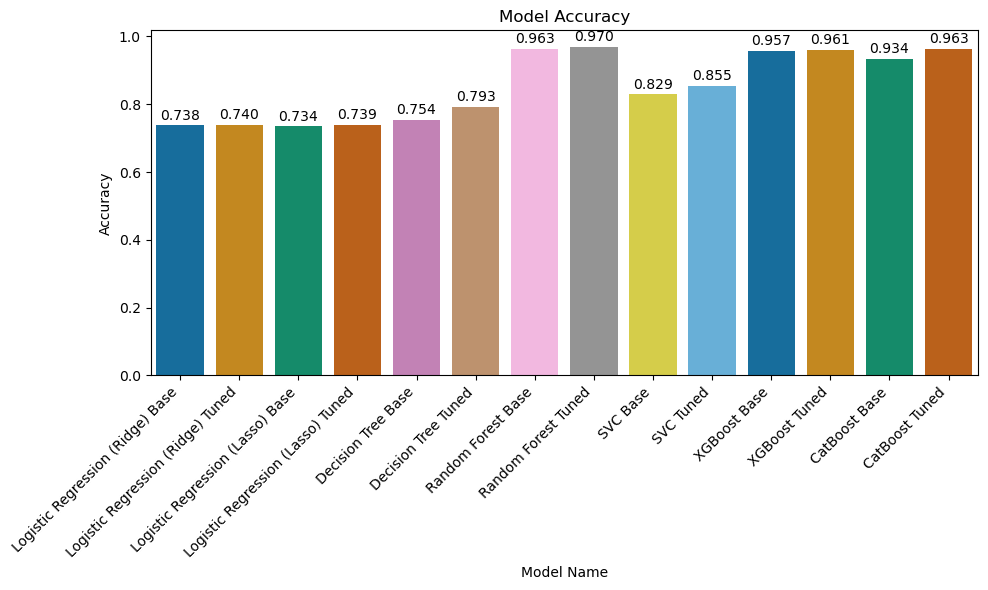

In [72]:
# Create lists for model names and accuracies from model_metrics 
model_names = list(model_metrics.keys())
model_accs = [model_metrics[name]['Accuracy'] for name in model_names]

# Plotting the bar plot
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x=model_names, y=model_accs, palette='colorblind')
plt.title('Model Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Model Name')  # Add x-axis label
plt.ylabel('Accuracy')    # Add y-axis label

# Add data labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=2, fmt='%.3f')  

plt.tight_layout()  
plt.show()

### Model Evaluation Process
- **Models Tested**: Evaluated Logistic Regression (Ridge and Lasso), Decision Tree, Random Forest, Support Vector Classifier (SVC), XGBoost, and CatBoost, covering a diverse range of algorithms suitable for classification.
- **Base Models**: Trained each model with default parameters to establish baseline performance on the preprocessed, SMOTE-balanced dataset.
- **Hyperparameter Tuning**: Used `GridSearchCV` with 5-fold cross-validation to optimize hyperparameters, focusing on accuracy as the primary metric, with `n_jobs=-1` for parallel processing.
- **Performance Metrics**: Assessed models on the test set using:
  - Accuracy: Overall prediction correctness.
  - Precision: Accuracy of positive (conversion) predictions.
  - Recall: Ability to identify all converters.
  - F1 Score: Balance of precision and recall.
  - Precision-Recall Curve: Trade-off analysis for class sensitivity.
  - 5-Fold Cross-Validation: Robustness across data splits.
- **Visualization**: Generated confusion matrices, feature importance plots (for tree-based models), precision-recall curves, and a bar plot comparing model accuracies to visualize performance and key predictors.

### Model Performance Overview
The bar plot below compares the accuracy of all models (base and tuned versions), highlighting the performance range:

- **Logistic Regression (Ridge and Lasso)**: Both base and tuned versions achieved accuracies around 0.738-0.740, with F1 scores of 0.739, indicating limited ability to capture complex patterns (CV mean: ~0.741).
- **Decision Tree**: Base accuracy was 0.754, improving to 0.793 after tuning, with an F1 score of 0.798, showing moderate improvement but higher variance in cross-validation (CV std: 0.0227).
- **Random Forest**: Base model scored 0.963 (F1: 0.964), improving to 0.970 after tuning (F1: 0.970), with balanced precision and recall (0.97 each), making it the top performer.
- **SVC**: Base accuracy was 0.829, rising to 0.855 after tuning (F1: 0.853), a notable improvement but still below tree-based models (CV mean: 0.848).
- **XGBoost**: Base accuracy was 0.934, reaching 0.961 after tuning (F1: 0.962), with strong cross-validation consistency (CV mean: 0.957, std: 0.0039).
- **CatBoost**: Base accuracy was 0.957, improving to 0.963 after tuning (F1: 0.964), closely competing with Random Forest (CV mean: 0.959, std: 0.0025).

### <p style="background-color:#18636d; font-family:calibri; color:#00c49a;padding:10px; font-size:150%; text-align:center; border-radius:50px 50px;">Step 7 | BEST MODEL SELECTION </p>
# --------------------------------------------------------------------------------------------


In [73]:
# Identify and Print the Best Model based on Accuracy, Precision, and Recall

# Dictionary of all tuned models 
all_models = {
    'Logistic Regression (Ridge)': lr_ridge_tuned,
    'Logistic Regression (Lasso)': lr_lasso_tuned,
    'Random Forest': rf_tuned,
    'XGBoost': xgb_tuned,
    'CatBoost': cat_tuned,
    'SVC': svc_tuned,
    'Decision Tree': dt_tuned
}

# Initialize a dictionary to store metrics
model_metrics = {}

# Evaluate each model on the test set
for name, model in all_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    model_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

# Determine the best model (using a combined score or individual preference)
# Here, we'll use a simple average of Accuracy, Precision, and Recall as a combined score
best_model_name = max(model_metrics, key=lambda x: (model_metrics[x]['Accuracy'] + model_metrics[x]['Precision'] + model_metrics[x]['Recall']) / 3)
best_model = all_models[best_model_name]

print("Best Model Based on Accuracy, Precision, and Recall:")
print(f"Model: {best_model_name}")
print(f"Accuracy: {model_metrics[best_model_name]['Accuracy']:.2f}")
print(f"Precision: {model_metrics[best_model_name]['Precision']:.2f}")
print(f"Recall: {model_metrics[best_model_name]['Recall']:.2f}")
print(f"Best Model Object: {best_model}")

Best Model Based on Accuracy, Precision, and Recall:
Model: Random Forest
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
Best Model Object: RandomForestClassifier(n_estimators=300, random_state=42)


In [74]:
# Save The best Model
joblib.dump(rf_tuned, 'RFmodel.pkl') # Save the tuned Random Forest model

['RFmodel.pkl']

### Key Insights and Observations
- **Top Performance**: Random Forest’s 0.97 across accuracy, precision, and recall ensures reliable identification of converters, critical for targeting high-potential customers (e.g., 35-44 age group, $100K-$150K income).
- **Feature Importance**: Top features (`EmailClicks`, `TimeOnSite_Bin`, `PreviousPurchases`, `AdSpend_Bin`, `EmailOpens`) align with EDA findings—e.g., converters spend more time on site (7.93 vs. 6.27 minutes)—guiding campaigns to focus on engaged, returning customers.
- **Robustness**: Random Forest’s cross-validation scores (mean: 0.961, std: 0.0030) indicate stability across data splits, outperforming Decision Tree’s higher variance (std: 0.0227) and Logistic Regression’s lower accuracy (0.741).
- **Improvement from Tuning**: Tuning boosted Random Forest’s accuracy by 0.007 (0.963 to 0.970), reducing false positives (48 to 46) and false negatives (58 to 39), enhancing precision and recall for better targeting.
-  **More Trees (300)**: Boosted accuracy to 0.970 by reducing variance, improving F1 (0.970).
- **Unlimited Depth (None)**: Captured patterns (e.g., EmailClicks), with AP of 1.00 and no overfitting (CV std: 0.0030).
- **Minimal Splits and Leaves (2, 1)**: Allowed detailed trees, fitting data complexity (CV mean: 0.961).

# --------------------x-----------------x--------------------x------------------------------

### Conclusion
This project successfully developed a Random Forest model to predict customer conversions, achieving an accuracy of 0.97, precision of 0.97, and recall of 0.97. Key features like `EmailClicks` and `TimeOnSite` drove predictions, aligning with EDA insights (e.g., converters’ 7.93 minutes on site vs. 6.27).The model enables precise targeting of high-potential customers (e.g., 35-44 age, $100K-$150K income), boosts conversion rates through high recall, and optimizes ROAS by focusing ad spend on impactful channels like referrals. 
